In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

occ_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Occupant_data\data_occ.csv')
ele_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Energy_use_data\data_ele.csv')

In [2]:
# Merging the important csv files together. We will start by merging the first two files together

elexoccmerged_df = pd.merge(ele_df, occ_df, on='date', how='inner')

elexoccmerged_df.to_csv('elexoccmerged_df.csv', index=False)

print("Merged DataFrame saved to elexoccmerged_df.csv")

Merged DataFrame saved to elexoccmerged_df.csv


In [3]:
elexoccmerged_df.dtypes

date                 object
mels_S              float64
lig_S               float64
mels_N              float64
hvac_N              float64
hvac_S              float64
Unnamed: 6          float64
occ_third_south     float64
occ_fourth_south    float64
dtype: object

In [4]:
elexoccmerged_df.isnull().sum()

date                   0
mels_S              2145
lig_S               2132
mels_N              2133
hvac_N              2132
hvac_S              2132
Unnamed: 6             0
occ_third_south        0
occ_fourth_south       0
dtype: int64

In [6]:
#replacing missing values with mean in the first merged file
numeric_columns = elexoccmerged_df.select_dtypes(include=np.number).columns

for column in numeric_columns:
    mean_value = elexoccmerged_df[column].mean()
    elexoccmerged_df[column].fillna(mean_value, inplace=True)

In [7]:
elexoccmerged_df.isnull().sum()

date                0
mels_S              0
lig_S               0
mels_N              0
hvac_N              0
hvac_S              0
Unnamed: 6          0
occ_third_south     0
occ_fourth_south    0
dtype: int64

In [25]:
#importing more files into jupyter
site_weather_df = pd.read_csv(r'C:\Users\presi\Downloads\Electricity_Prediction_data\doi_10_7941_D1N33Q__v20220202\Building_59\Bldg59_postprocess\Outdoor_environmental_data\data_site_weather.csv')

In [29]:
# Merging the important csv files together and saving as csv file

SWXZTIXelexoccmerged_df = pd.merge(ZTIXelexoccmerged_df, site_weather_df, on='date', how='inner')

SWXZTIXelexoccmerged_df.to_csv('SWXZTIXelexoccmerged_df.csv', index=False)

print("Merged DataFrame saved to SWXZTIXelexoccmerged_df.csv")

Merged DataFrame saved to SWXZTIXelexoccmerged_df.csv


In [30]:
SWXZTIXelexoccmerged_df.isnull().sum()

date                               0
mels_S                             0
lig_S                              0
mels_N                             0
hvac_N                             0
hvac_S                             0
Unnamed: 6                         0
occ_third_south                    0
occ_fourth_south                   0
cerc_templogger_1               1594
cerc_templogger_10               149
cerc_templogger_11               150
cerc_templogger_12              7817
cerc_templogger_13               562
cerc_templogger_14              1110
cerc_templogger_15               432
cerc_templogger_16              3696
cerc_templogger_2                149
cerc_templogger_3                149
cerc_templogger_4                149
cerc_templogger_5                149
cerc_templogger_6                150
cerc_templogger_7                149
cerc_templogger_8                149
cerc_templogger_9                150
air_temp_set_1                     0
air_temp_set_2                     0
d

In [31]:
#filling missing values with the mean of the features
numeric_columns = SWXZTIXelexoccmerged_df.select_dtypes(include=np.number).columns

for column in numeric_columns:
    mean_value = SWXZTIXelexoccmerged_df[column].mean()
    SWXZTIXelexoccmerged_df[column].fillna(mean_value, inplace=True)

In [33]:
SWXZTIXelexoccmerged_df.isnull().sum()

date                            0
mels_S                          0
lig_S                           0
mels_N                          0
hvac_N                          0
hvac_S                          0
Unnamed: 6                      0
occ_third_south                 0
occ_fourth_south                0
cerc_templogger_1               0
cerc_templogger_10              0
cerc_templogger_11              0
cerc_templogger_12              0
cerc_templogger_13              0
cerc_templogger_14              0
cerc_templogger_15              0
cerc_templogger_16              0
cerc_templogger_2               0
cerc_templogger_3               0
cerc_templogger_4               0
cerc_templogger_5               0
cerc_templogger_6               0
cerc_templogger_7               0
cerc_templogger_8               0
cerc_templogger_9               0
air_temp_set_1                  0
air_temp_set_2                  0
dew_point_temperature_set_1d    0
relative_humidity_set_1         0
solar_radiatio

In [35]:
# Checking for columns with negative values
numeric_cols = SWXZTIXelexoccmerged_df.select_dtypes(include='number')

negative_mask = (numeric_cols < 0)

columns_with_negatives = numeric_cols.columns[negative_mask.any()].tolist()

print("Columns with negative values:", columns_with_negatives)


Columns with negative values: ['dew_point_temperature_set_1d']


In [37]:
# Converting all fahrenheits to celcius
fahrenheit_cols = ['cerc_templogger_1', 'cerc_templogger_11', 'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14', 'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2', 'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5', 'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8', 'cerc_templogger_9', 'cerc_templogger_10']

for col in fahrenheit_cols:
    print(f"Converting column {col} from Fahrenheit to Celsius...")
    SWXZTIXelexoccmerged_df[col] = SWXZTIXelexoccmerged_df[col].apply(lambda x: (x - 32) / 1.8)

print("Conversion complete.")

Converting column cerc_templogger_1 from Fahrenheit to Celsius...
Converting column cerc_templogger_11 from Fahrenheit to Celsius...
Converting column cerc_templogger_12 from Fahrenheit to Celsius...
Converting column cerc_templogger_13 from Fahrenheit to Celsius...
Converting column cerc_templogger_14 from Fahrenheit to Celsius...
Converting column cerc_templogger_15 from Fahrenheit to Celsius...
Converting column cerc_templogger_16 from Fahrenheit to Celsius...
Converting column cerc_templogger_2 from Fahrenheit to Celsius...
Converting column cerc_templogger_3 from Fahrenheit to Celsius...
Converting column cerc_templogger_4 from Fahrenheit to Celsius...
Converting column cerc_templogger_5 from Fahrenheit to Celsius...
Converting column cerc_templogger_6 from Fahrenheit to Celsius...
Converting column cerc_templogger_7 from Fahrenheit to Celsius...
Converting column cerc_templogger_8 from Fahrenheit to Celsius...
Converting column cerc_templogger_9 from Fahrenheit to Celsius...
Conv

In [38]:
# Checking for columns with negative values
numeric_cols = SWXZTIXelexoccmerged_df.select_dtypes(include='number')

negative_mask = (numeric_cols < 0)

columns_with_negatives = numeric_cols.columns[negative_mask.any()].tolist()

print("Columns with negative values:", columns_with_negatives)

Columns with negative values: ['cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11', 'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14', 'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2', 'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5', 'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8', 'cerc_templogger_9', 'dew_point_temperature_set_1d']


In [39]:
#performing standardization before checking for multicollinearity

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaledSWXZTIXelexoccmerged_df = SWXZTIXelexoccmerged_df.drop(columns=['date']).copy() 
scaledSWXZTIXelexoccmerged_df = pd.DataFrame(scaler.fit_transform(scaledSWXZTIXelexoccmerged_df), columns=scaledSWXZTIXelexoccmerged_df.columns)

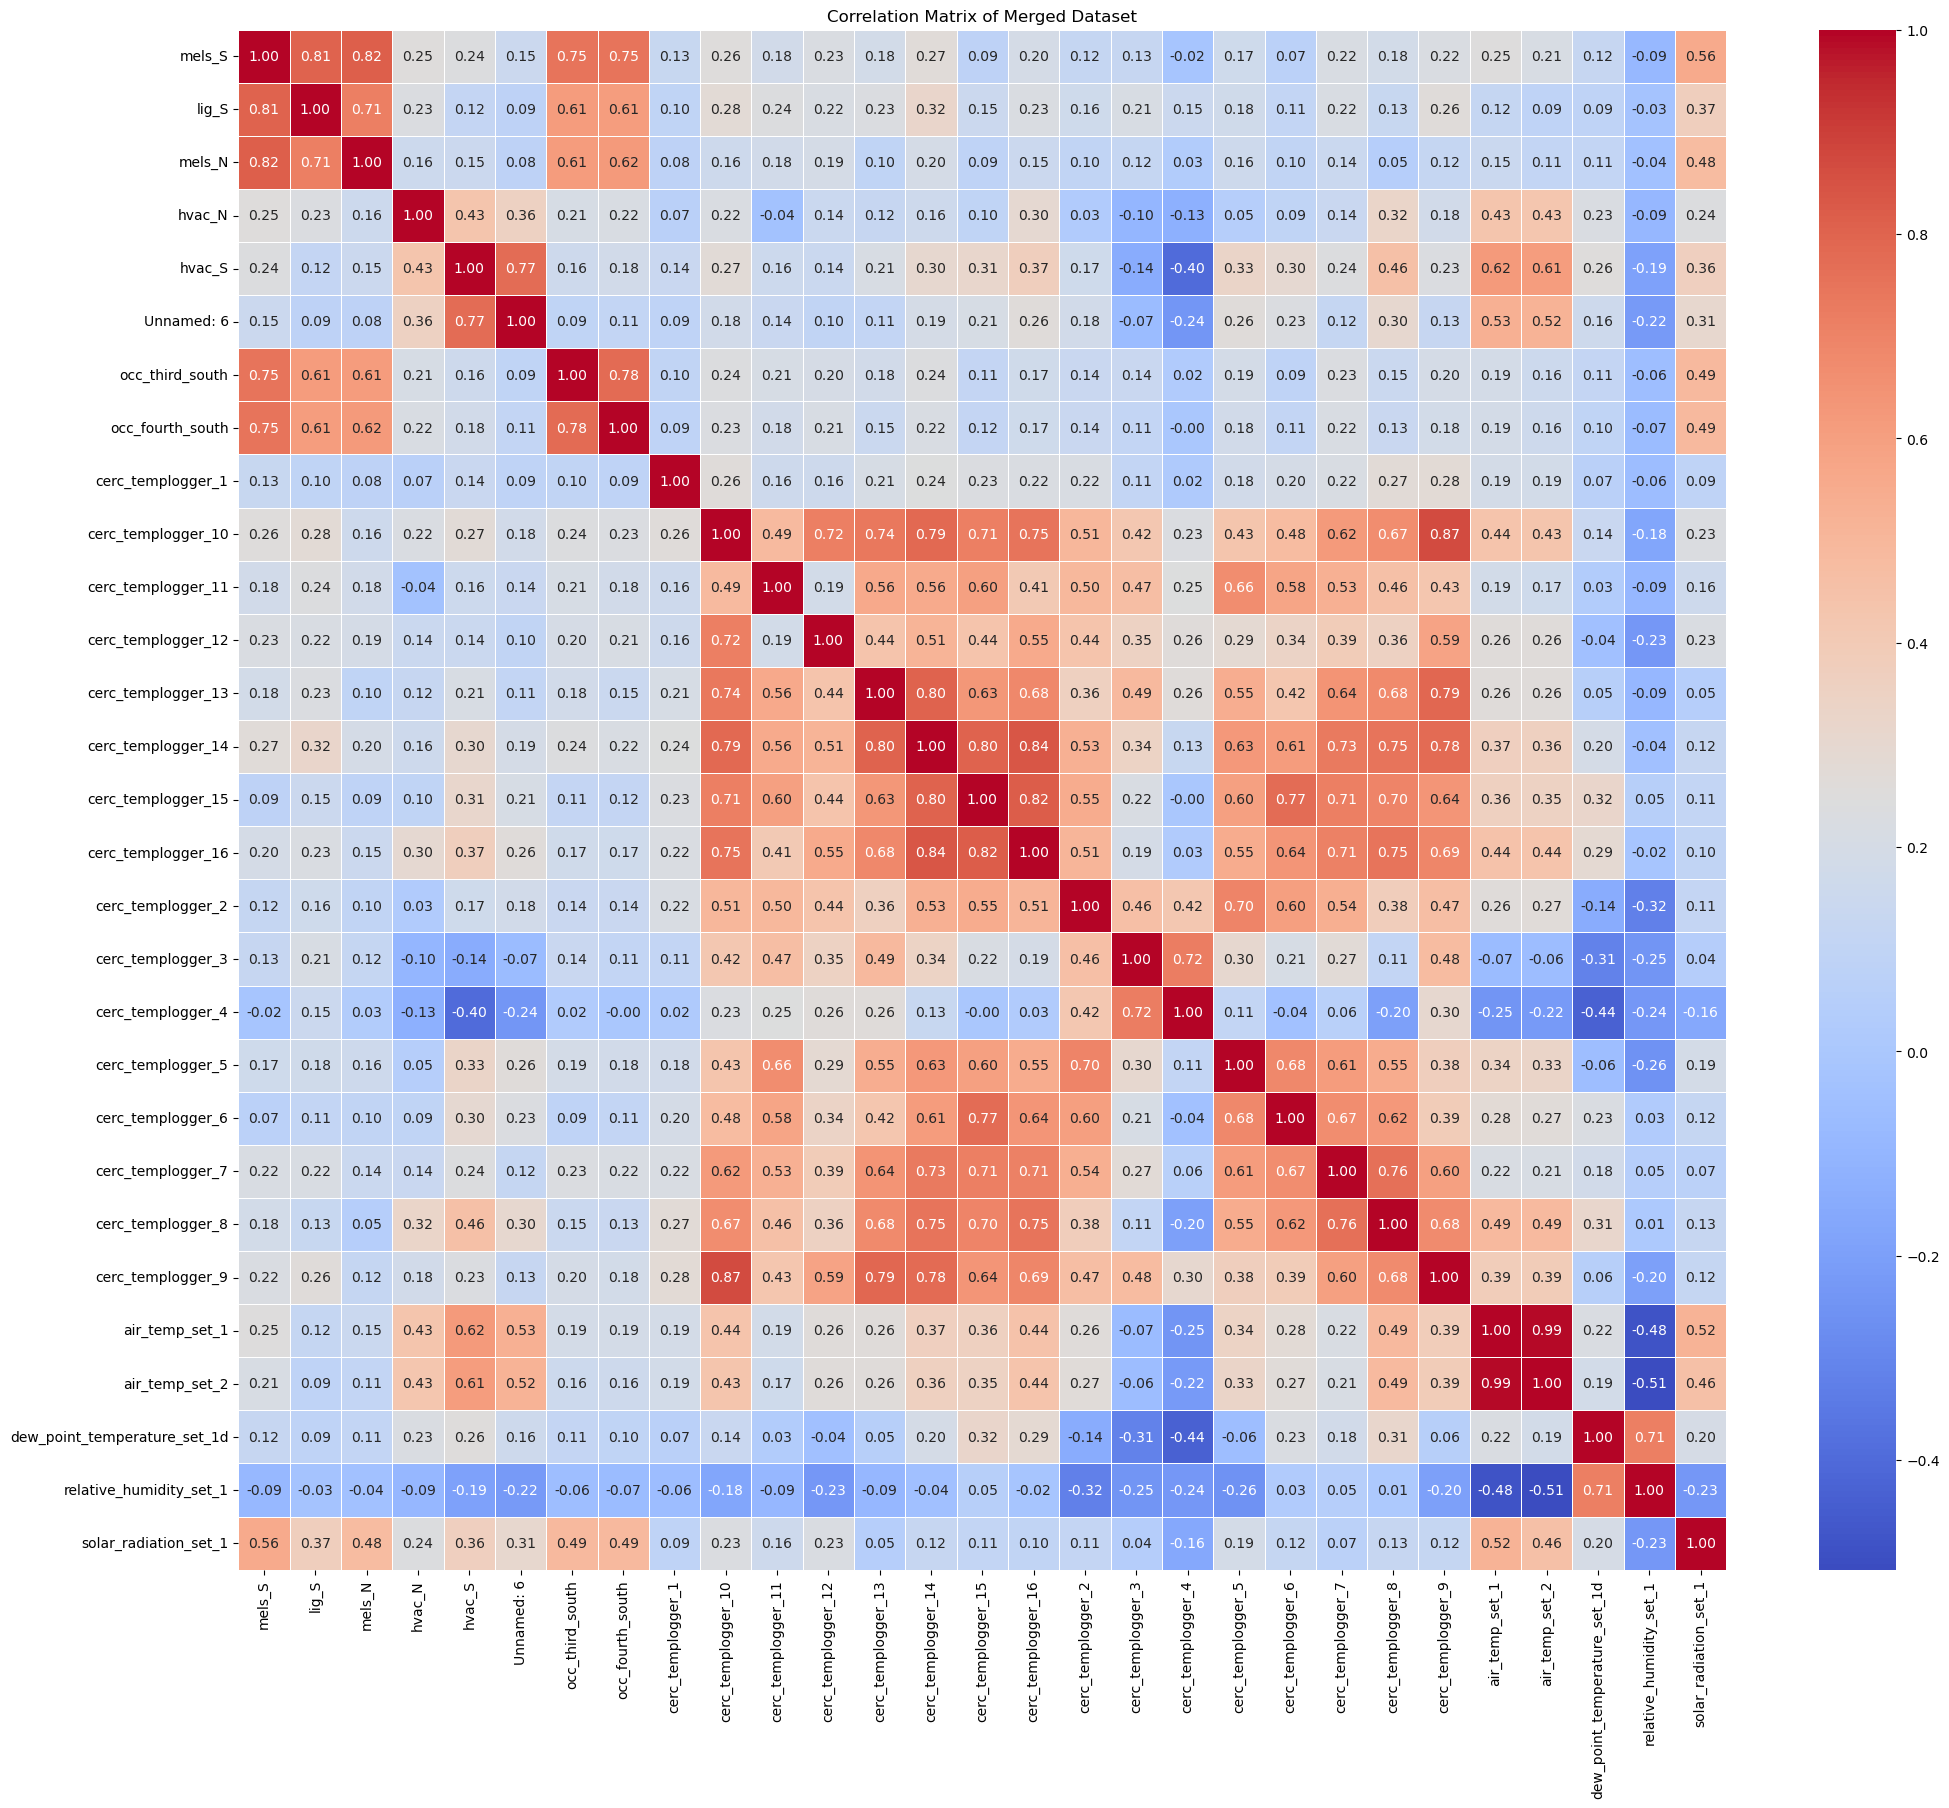

In [40]:
#plotting the correlation matrix for unscaled data
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = SWXZTIXelexoccmerged_df.drop(columns=['date']).corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Merged Dataset')
plt.show()

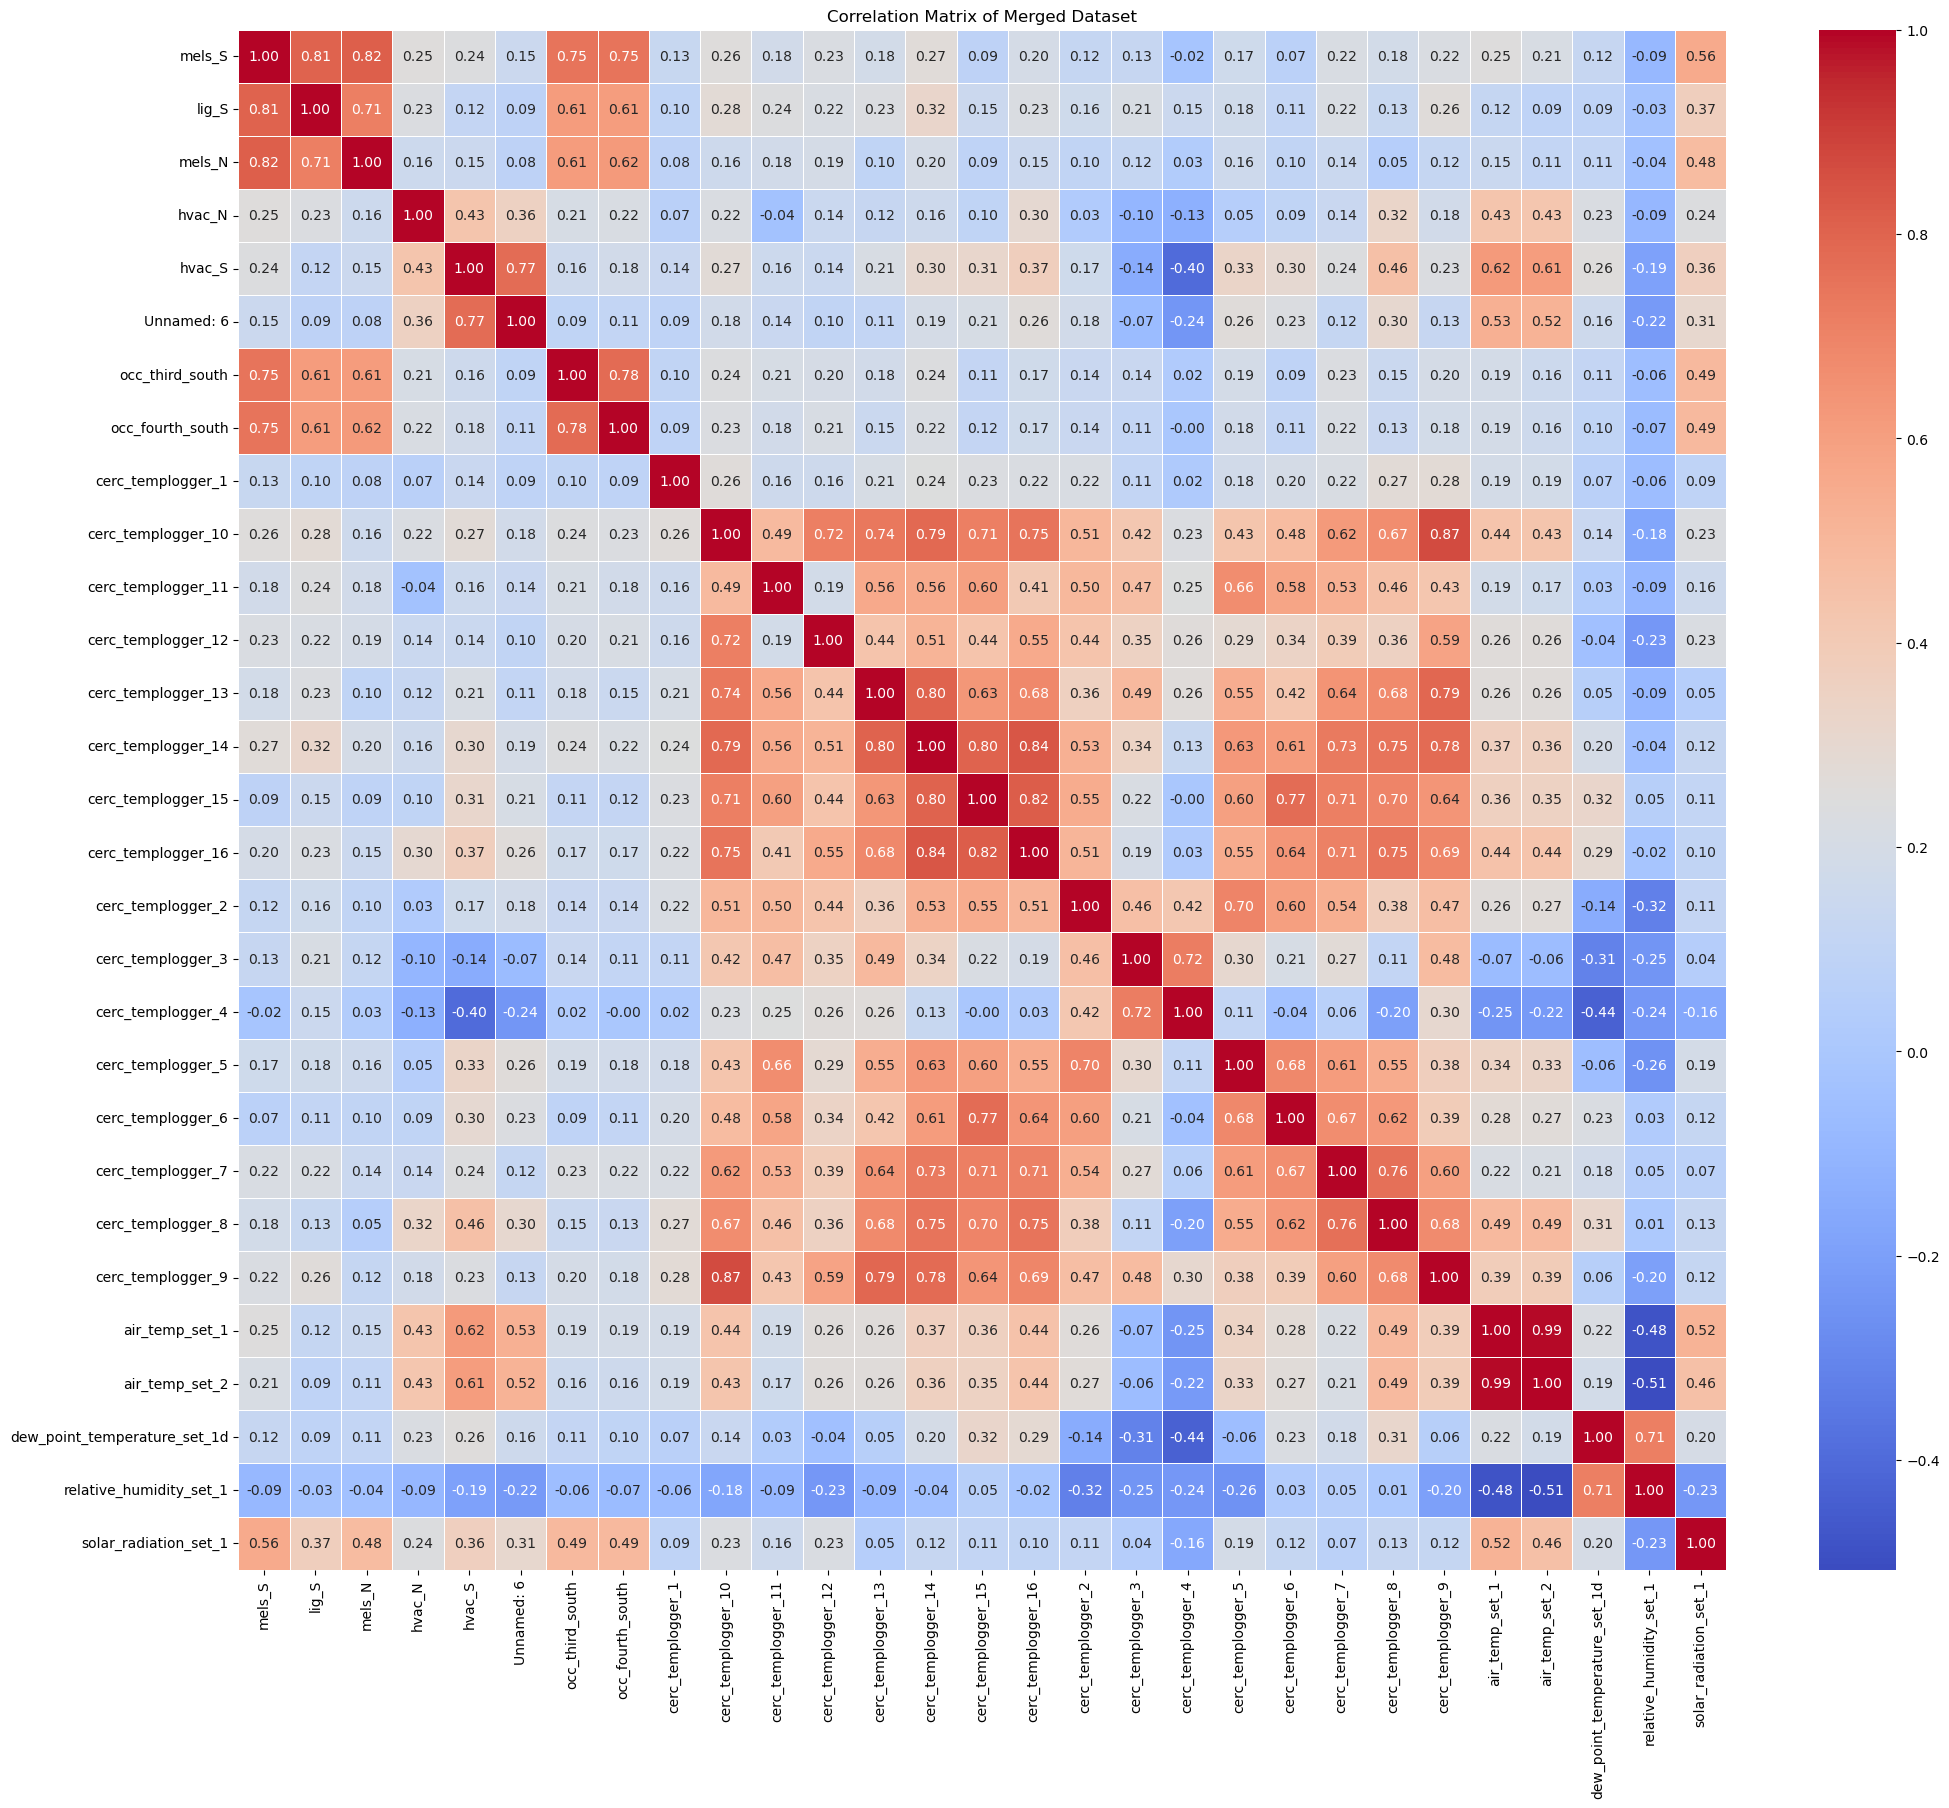

In [42]:
#plotting the correlation matrix for scaled data
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = scaledSWXZTIXelexoccmerged_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Merged Dataset')
plt.show()

In [43]:
#Calculating for VIf but dropping date first for unscaled data to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

SWXZTIXelexoccmerged_df_without_date = SWXZTIXelexoccmerged_df.drop(columns=['date'])

vif_data = pd.DataFrame()
vif_data["Feature"] = SWXZTIXelexoccmerged_df_without_date.columns
vif_data["VIF"] = [variance_inflation_factor(SWXZTIXelexoccmerged_df_without_date.values, i) for i in range(SWXZTIXelexoccmerged_df_without_date.shape[1])]

print(vif_data)

                         Feature          VIF
0                         mels_S    24.344347
1                          lig_S     6.899514
2                         mels_N    24.661140
3                         hvac_N    14.008817
4                         hvac_S    15.469455
5                     Unnamed: 6     7.258131
6                occ_third_south     4.206565
7               occ_fourth_south     4.185644
8              cerc_templogger_1    20.556473
9             cerc_templogger_10   887.239188
10            cerc_templogger_11   392.360117
11            cerc_templogger_12   393.821523
12            cerc_templogger_13   742.749831
13            cerc_templogger_14   973.010121
14            cerc_templogger_15   965.779544
15            cerc_templogger_16   791.793337
16             cerc_templogger_2  1036.749396
17             cerc_templogger_3   291.494718
18             cerc_templogger_4   304.216110
19             cerc_templogger_5   656.112117
20             cerc_templogger_6  

In [44]:
#Calculating for VIf using scaled data to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Feature"] = scaledSWXZTIXelexoccmerged_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaledSWXZTIXelexoccmerged_df.values, i) for i in range(scaledSWXZTIXelexoccmerged_df.shape[1])]

print(vif_data)

                         Feature         VIF
0                         mels_S    7.589926
1                          lig_S    3.535847
2                         mels_N    3.536927
3                         hvac_N    1.724339
4                         hvac_S    3.859127
5                     Unnamed: 6    2.753294
6                occ_third_south    3.110631
7               occ_fourth_south    3.123599
8              cerc_templogger_1    1.130743
9             cerc_templogger_10    8.291532
10            cerc_templogger_11    3.231665
11            cerc_templogger_12    2.829515
12            cerc_templogger_13    6.379560
13            cerc_templogger_14    7.132607
14            cerc_templogger_15    7.360882
15            cerc_templogger_16    6.529203
16             cerc_templogger_2    4.791814
17             cerc_templogger_3    3.291147
18             cerc_templogger_4    4.884881
19             cerc_templogger_5    5.419706
20             cerc_templogger_6    4.214000
21        

In [45]:
#dropping multicollinearing features for scaled data
selected_columns = ['air_temp_set_2', 'relative_humidity_set_1']
scaledSWXZTIXelexoccmerged_df.drop(columns=selected_columns, inplace=True)

In [46]:
#Calculating for VIf using scaled data
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Feature"] = scaledSWXZTIXelexoccmerged_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaledSWXZTIXelexoccmerged_df.values, i) for i in range(scaledSWXZTIXelexoccmerged_df.shape[1])]

print(vif_data)

                         Feature       VIF
0                         mels_S  7.569816
1                          lig_S  3.522761
2                         mels_N  3.535984
3                         hvac_N  1.719651
4                         hvac_S  3.853963
5                     Unnamed: 6  2.751709
6                occ_third_south  3.105532
7               occ_fourth_south  3.117652
8              cerc_templogger_1  1.130214
9             cerc_templogger_10  8.214017
10            cerc_templogger_11  3.213338
11            cerc_templogger_12  2.827487
12            cerc_templogger_13  6.341967
13            cerc_templogger_14  7.035127
14            cerc_templogger_15  7.326274
15            cerc_templogger_16  6.528921
16             cerc_templogger_2  4.600673
17             cerc_templogger_3  3.289501
18             cerc_templogger_4  4.827441
19             cerc_templogger_5  5.375769
20             cerc_templogger_6  4.206204
21             cerc_templogger_7  3.982456
22         

In [47]:
#dropping multicollinearing features for unscaled data
selected_columns = ['air_temp_set_2', 'relative_humidity_set_1']
SWXZTIXelexoccmerged_df.drop(columns=selected_columns, inplace=True)

In [48]:
#Calculating for VIf but dropping date first for unscaled data
from statsmodels.stats.outliers_influence import variance_inflation_factor

SWXZTIXelexoccmerged_df_without_date = SWXZTIXelexoccmerged_df.drop(columns=['date'])

vif_data = pd.DataFrame()
vif_data["Feature"] = SWXZTIXelexoccmerged_df_without_date.columns
vif_data["VIF"] = [variance_inflation_factor(SWXZTIXelexoccmerged_df_without_date.values, i) for i in range(SWXZTIXelexoccmerged_df_without_date.shape[1])]

print(vif_data)

                         Feature         VIF
0                         mels_S   24.275805
1                          lig_S    6.843539
2                         mels_N   24.546202
3                         hvac_N   13.984933
4                         hvac_S   15.462680
5                     Unnamed: 6    7.257604
6                occ_third_south    4.204382
7               occ_fourth_south    4.180224
8              cerc_templogger_1   20.550418
9             cerc_templogger_10  885.176303
10            cerc_templogger_11  378.229499
11            cerc_templogger_12  376.633576
12            cerc_templogger_13  732.378926
13            cerc_templogger_14  964.686747
14            cerc_templogger_15  959.442108
15            cerc_templogger_16  787.321507
16             cerc_templogger_2  898.689291
17             cerc_templogger_3  290.803388
18             cerc_templogger_4  302.503970
19             cerc_templogger_5  645.233898
20             cerc_templogger_6  596.295101
21        

In [121]:
#training and testing my dataset using linear regression without using polynomial feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

X = SWXZTIXelexoccmerged_df_without_date.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = SWXZTIXelexoccmerged_df_without_date[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_without_poly = []
y_preds_without_poly = []
models_with_poly = []
y_preds_with_poly = []

for i in range(5):
    # Training and testing without polynomial features
    model_without_poly = LinearRegression()
    model_without_poly.fit(X_train, y_train.iloc[:, i])
    y_pred_without_poly = model_without_poly.predict(X_test)
    
    # Training and testing with polynomial features
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model_with_poly = LinearRegression()
    model_with_poly.fit(X_train_poly, y_train.iloc[:, i])
    y_pred_with_poly = model_with_poly.predict(X_test_poly)
    
    models_without_poly.append(model_without_poly)
    y_preds_without_poly.append(y_pred_without_poly)
    models_with_poly.append(model_with_poly)
    y_preds_with_poly.append(y_pred_with_poly)

mses_without_poly = [mean_squared_error(y_test.iloc[:, i], y_preds_without_poly[i]) for i in range(5)]
print("Mean Squared Errors without Polynomial Features:", mses_without_poly)

r2_scores_without_poly = [r2_score(y_test.iloc[:, i], y_preds_without_poly[i]) for i in range(5)]
print("R-squared without Polynomial Features:", r2_scores_without_poly)

maes_without_poly = [mean_absolute_error(y_test.iloc[:, i], y_preds_without_poly[i]) for i in range(5)]
print("Mean Absolute Errors without Polynomial Features:", maes_without_poly)

mses_with_poly = [mean_squared_error(y_test.iloc[:, i], y_preds_with_poly[i]) for i in range(5)]
print("Mean Squared Errors with Polynomial Features:", mses_with_poly)

r2_scores_with_poly = [r2_score(y_test.iloc[:, i], y_preds_with_poly[i]) for i in range(5)]
print("R-squared with Polynomial Features:", r2_scores_with_poly)

maes_with_poly = [mean_absolute_error(y_test.iloc[:, i], y_preds_with_poly[i]) for i in range(5)]
print("Mean Absolute Errors with Polynomial Features:", maes_with_poly)

Mean Squared Errors without Polynomial Features: [1.7609204930897786, 1.706829672470761, 12.74340893191609, 80.95235790817154, 34.316323208652406]
R-squared without Polynomial Features: [0.7042319641036509, 0.4946438740085334, 0.5107087313353263, 0.3790973775898745, 0.7300595438575266]
Mean Absolute Errors without Polynomial Features: [0.9313114860562421, 1.0525981622176257, 2.5543192325802058, 7.150291189545035, 4.355283037557015]
Mean Squared Errors with Polynomial Features: [1.0980827380250513, 1.1403010478449918, 8.493819365427937, 57.201148294592336, 25.303769707186735]
R-squared with Polynomial Features: [0.8155636350693567, 0.6623810042107019, 0.6738744181150653, 0.5612685794616273, 0.8009544584555066]
Mean Absolute Errors with Polynomial Features: [0.7275840588454462, 0.7910130286361363, 2.082428156963954, 5.713503941723577, 3.6011702192332864]


In [125]:
# Training and testing with scaled data and linear regression (no polynomial features)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Splitting data
X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Linear regression without polynomial features (scaled data)
models_without_poly_scaled = []
y_preds_without_poly_scaled = []
models_with_poly_scaled = []
y_preds_with_poly_scaled = []

# Training and testing
for i in range(5):
    # Without polynomial features
    model_without_poly_scaled = LinearRegression()
    model_without_poly_scaled.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_without_poly_scaled = model_without_poly_scaled.predict(X_test_scaled)
    
    # With polynomial features
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model_with_poly_scaled = LinearRegression()
    model_with_poly_scaled.fit(X_train_poly, y_train_scaled.iloc[:, i])
    y_pred_with_poly_scaled = model_with_poly_scaled.predict(X_test_poly)
    
    # Storing models and predictions
    models_without_poly_scaled.append(model_without_poly_scaled)
    y_preds_without_poly_scaled.append(y_pred_without_poly_scaled)
    models_with_poly_scaled.append(model_with_poly_scaled)
    y_preds_with_poly_scaled.append(y_pred_with_poly_scaled)

# Calculating metrics
mses_without_poly_scaled = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors without Polynomial Features:", mses_without_poly)

r2_scores_without_poly_scaled = [r2_score(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("R-squared without Polynomial Features:", r2_scores_without_poly)

maes_without_poly_scaled = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_without_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors without Polynomial Features:", maes_without_poly)

mses_with_poly_scaled = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Polynomial Features:", mses_with_poly)

r2_scores_with_poly_scaled = [r2_score(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("R-squared with Polynomial Features:", r2_scores_with_poly)

maes_with_poly_scaled = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_with_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Polynomial Features:", maes_with_poly)

Mean Squared Errors without Polynomial Features: [1.7609204930897786, 1.706829672470761, 12.74340893191609, 80.95235790817154, 34.316323208652406]
R-squared without Polynomial Features: [0.7042319641036509, 0.4946438740085334, 0.5107087313353263, 0.3790973775898745, 0.7300595438575266]
Mean Absolute Errors without Polynomial Features: [0.9313114860562421, 1.0525981622176257, 2.5543192325802058, 7.150291189545035, 4.355283037557015]
Mean Squared Errors with Polynomial Features: [1.0980827380250513, 1.1403010478449918, 8.493819365427937, 57.201148294592336, 25.303769707186735]
R-squared with Polynomial Features: [0.8155636350693567, 0.6623810042107019, 0.6738744181150653, 0.5612685794616273, 0.8009544584555066]
Mean Absolute Errors with Polynomial Features: [0.7275840588454462, 0.7910130286361363, 2.082428156963954, 5.713503941723577, 3.6011702192332864]


In [114]:
#Random Forest Regressor using unscaled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = SWXZTIXelexoccmerged_df_without_date.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = SWXZTIXelexoccmerged_df_without_date[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 50
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

for i in range(y.shape[1]):
    rf_regressor.fit(X_train, y_train.iloc[:, i])
    y_pred_RF = rf_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_RF)
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_RF)
    r2 = r2_score(y_test.iloc[:, i], y_pred_RF)
    
    print(f"For target variable {y.columns[i]}:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

For target variable mels_S:
Mean Squared Error: 0.3150814283287896
Mean Absolute Error: 0.3220662661367681
R-squared: 0.9470782380181709

For target variable lig_S:
Mean Squared Error: 0.3000605878916617
Mean Absolute Error: 0.3010406095096084
R-squared: 0.9111584133405967

For target variable mels_N:
Mean Squared Error: 3.8960452710477242
Mean Absolute Error: 1.2280994903770357
R-squared: 0.850408870685176

For target variable hvac_N:
Mean Squared Error: 18.500545408685387
Mean Absolute Error: 2.5585536405129083
R-squared: 0.8581012652738206

For target variable hvac_S:
Mean Squared Error: 7.4231885550077825
Mean Absolute Error: 1.5341747229445557
R-squared: 0.9416074125311551



In [115]:
#Random Forest Regression using scaled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using scaled data
X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

max_depth = 50
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

for i in range(y_scaled.shape[1]):
    rf_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_RF_scaled = rf_regressor.predict(X_test_scaled)
    
    mse_scaled = mean_squared_error(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    mae_scaled = mean_absolute_error(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    r2_scaled = r2_score(y_test_scaled.iloc[:, i], y_pred_RF_scaled)
    
    print(f"For target variable {y_scaled.columns[i]} (Scaled Data):")
    print("Mean Squared Error:", mse_scaled)
    print("Mean Absolute Error:", mae_scaled)
    print("R-squared:", r2_scaled)
    print()

For target variable mels_S (Scaled Data):
Mean Squared Error: 0.05486177177055319
Mean Absolute Error: 0.13447128151678714
R-squared: 0.9468635962659872

For target variable lig_S (Scaled Data):
Mean Squared Error: 0.08932918125430143
Mean Absolute Error: 0.16421352118093524
R-squared: 0.910973690537199

For target variable mels_N (Scaled Data):
Mean Squared Error: 0.157547089494344
Mean Absolute Error: 0.24703566218159337
R-squared: 0.851189118922367

For target variable hvac_N (Scaled Data):
Mean Squared Error: 0.14794655679798557
Mean Absolute Error: 0.22817263302367996
R-squared: 0.8578414408068754

For target variable hvac_S (Scaled Data):
Mean Squared Error: 0.05846503525298767
Mean Absolute Error: 0.13627274760869726
R-squared: 0.9415258172401818



In [106]:
#Support vector regression model for unscaled data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = SWXZTIXelexoccmerged_df_without_date.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = SWXZTIXelexoccmerged_df_without_date[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel='rbf')

for i in range(y.shape[1]):
    svr_regressor.fit(X_train, y_train.iloc[:, i])
    y_pred_SVR = svr_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test.iloc[:, i], y_pred_SVR)
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_SVR)
    r2 = r2_score(y_test.iloc[:, i], y_pred_SVR)
    
    print(f"For target variable {y.columns[i]}:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

For target variable mels_S:
Mean Squared Error: 1.8451583566280585
Mean Absolute Error: 0.9157996062348933
R-squared: 0.6900831893323918

For target variable lig_S:
Mean Squared Error: 1.8473506807249676
Mean Absolute Error: 0.9628708220627158
R-squared: 0.4530385788246478

For target variable mels_N:
Mean Squared Error: 14.221981108977348
Mean Absolute Error: 2.46633116620542
R-squared: 0.45393801478752005

For target variable hvac_N:
Mean Squared Error: 108.7503224823567
Mean Absolute Error: 7.834221347415949
R-squared: 0.16588766328662885

For target variable hvac_S:
Mean Squared Error: 57.657512440279014
Mean Absolute Error: 5.153376373891305
R-squared: 0.5464521326036185



In [107]:
#Support vector regression model for scaled data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using scaled data
X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel='rbf') 

for i in range(y_scaled.shape[1]):
    svr_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_SVR_scaled = svr_regressor.predict(X_test_scaled)
    
    mse_scaled = mean_squared_error(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    mae_scaled = mean_absolute_error(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    r2_scaled = r2_score(y_test_scaled.iloc[:, i], y_pred_SVR_scaled)
    
    print(f"For target variable {y_scaled.columns[i]} (Scaled Data):")
    print("Mean Squared Error:", mse_scaled)
    print("Mean Absolute Error:", mae_scaled)
    print("R-squared:", r2_scaled)
    print()

For target variable mels_S (Scaled Data):
Mean Squared Error: 0.10030320660419674
Mean Absolute Error: 0.19625838411998106
R-squared: 0.9028512658281039

For target variable lig_S (Scaled Data):
Mean Squared Error: 0.22090799855214854
Mean Absolute Error: 0.29472271486271545
R-squared: 0.7798409929905793

For target variable mels_N (Scaled Data):
Mean Squared Error: 0.2552010166343368
Mean Absolute Error: 0.30899922505638383
R-squared: 0.758950239835267

For target variable hvac_N (Scaled Data):
Mean Squared Error: 0.36290007232564697
Mean Absolute Error: 0.40603171650801945
R-squared: 0.6512973838023306

For target variable hvac_S (Scaled Data):
Mean Squared Error: 0.1354588108741008
Mean Absolute Error: 0.22752129715886582
R-squared: 0.8645199950841551



In [55]:
#Gradient boosting regression model for unscaled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = SWXZTIXelexoccmerged_df_without_date.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = SWXZTIXelexoccmerged_df_without_date[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_regressor = GradientBoostingRegressor()

models_gb = []
y_preds_gb = []


for i in range(5):
    
    gb_regressor.fit(X_train, y_train.iloc[:, i])
    
    
    y_pred_gb = gb_regressor.predict(X_test)
    
    
    models_gb.append(gb_regressor)
    y_preds_gb.append(y_pred_gb)

mses_gb = [mean_squared_error(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test.iloc[:, i], y_preds_gb[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.8268913352468719, 0.7558635169269992, 7.694746417687762, 41.74154892179455, 16.580748832910153]
R-squared with Gradient Boosting Regression: [0.8611135329020174, 0.7762048171218109, 0.7045553307691508, 0.6798433318223753, 0.8695718397357024]
Mean Absolute Errors with Gradient Boosting Regression: [0.607151530247438, 0.6048305319154196, 1.9260595136090288, 4.715102816184918, 2.857893722976531]


In [128]:
#Gradient boosting regression model for scaled data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Using scaled data
X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor()

models_gb_scaled = []
y_preds_gb_scaled = []

for i in range(5):
    gb_regressor.fit(X_train_scaled, y_train_scaled.iloc[:, i])
    y_pred_gb_scaled = gb_regressor.predict(X_test_scaled)
    models_gb_scaled.append(gb_regressor)
    y_preds_gb_scaled.append(y_pred_gb_scaled)

mses_gb = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.14345081571167748, 0.22511543633288275, 0.3130269711209963, 0.3331614116430457, 0.13056723376158008]
R-squared with Gradient Boosting Regression: [0.8610606217475374, 0.7756478205842768, 0.7043308161192623, 0.6798726020870278, 0.8694123375384712]
Mean Absolute Errors with Gradient Boosting Regression: [0.2528174623585858, 0.32982765708539324, 0.3884144838726784, 0.4212424173148111, 0.25356976743382675]


In [132]:
#Gradient boosting regression model for unscaled data, using polynomial features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = SWXZTIXelexoccmerged_df_without_date.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y = SWXZTIXelexoccmerged_df_without_date[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

gb_regressor = GradientBoostingRegressor()

models_gb_poly = []
y_preds_gb_poly = []

for i in range(5):
    gb_regressor.fit(X_train_poly, y_train.iloc[:, i])
    
    y_preds_gb_poly_current = gb_regressor.predict(X_test_poly)
    
    models_gb_poly.append(gb_regressor)
    y_preds_gb_poly.append(y_preds_gb_poly_current)

mses_gb = [mean_squared_error(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test.iloc[:, i], y_preds_gb_poly[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)

Mean Squared Errors with Gradient Boosting Regression: [0.755822181488, 0.7205264473550412, 7.1595481220398804, 41.290368617328404, 16.58067158326126]
R-squared with Gradient Boosting Regression: [0.8730504625377187, 0.786667375202914, 0.7251046087891687, 0.6833038738184541, 0.8695724474000298]
Mean Absolute Errors with Gradient Boosting Regression: [0.5802192415129342, 0.5859841775862608, 1.858411887563347, 4.708680525423787, 2.8361983108808415]


In [134]:
#Gradient boosting regression model for scaled data, using polynomial features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

degree = 2 
poly = PolynomialFeatures(degree)
X_train_poly_scaled = poly.fit_transform(X_train_scaled)
X_test_poly_scaled = poly.transform(X_test_scaled)

gb_regressor = GradientBoostingRegressor()

models_gb_poly_scaled = []
y_preds_gb_poly_scaled = []

for i in range(5):
    gb_regressor.fit(X_train_poly_scaled, y_train_scaled.iloc[:, i])
    
    y_preds_gb_poly_scaled_current = gb_regressor.predict(X_test_poly_scaled)
    
    models_gb_poly_scaled.append(gb_regressor)
    y_preds_gb_poly_scaled.append(y_preds_gb_poly_scaled_current)

mses_gb = [mean_squared_error(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("Mean Squared Errors with Gradient Boosting Regression:", mses_gb)

r2_scores_gb = [r2_score(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("R-squared with Gradient Boosting Regression:", r2_scores_gb)

maes_gb = [mean_absolute_error(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i]) for i in range(5)]
print("Mean Absolute Errors with Gradient Boosting Regression:", maes_gb)


Mean Squared Errors with Gradient Boosting Regression: [0.12990518613967644, 0.2087223561244912, 0.2861499814763414, 0.3203409512368589, 0.12055776148341292]
R-squared with Gradient Boosting Regression: [0.8741802498335476, 0.791985319833555, 0.7297174387637835, 0.6921914976326986, 0.8794233759102128]
Mean Absolute Errors with Gradient Boosting Regression: [0.24005759518939926, 0.3156850532285756, 0.37159050329985066, 0.41326962380539506, 0.24103574753221035]


In [67]:
#Cross validation for all models, scaled data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
svr_regressor = SVR(kernel='rbf')
gb_regressor = GradientBoostingRegressor()

models = {
    "Linear Regression": linear_regressor,
    "Random Forest": rf_regressor,
    "SVR": svr_regressor,
    "Gradient Boosting": gb_regressor
}

for i in range(y_scaled.shape[1]):
    y_train_target_scaled = y_train_scaled.iloc[:, i]
    y_test_target_scaled = y_test_scaled.iloc[:, i]
    
    for name, model in models.items():
        cv_mse = cross_val_score(model, X_train_scaled, y_train_target_scaled, scoring='neg_mean_squared_error', cv=kf)
        cv_r2 = cross_val_score(model, X_train_scaled, y_train_target_scaled, scoring='r2', cv=kf)
        cv_mae = cross_val_score(model, X_train_scaled, y_train_target_scaled, scoring='neg_mean_absolute_error', cv=kf)

        cv_mse = -cv_mse
        cv_mae = -cv_mae

        mean_mse = cv_mse.mean()
        mean_r2 = cv_r2.mean()
        mean_mae = cv_mae.mean()

        print(f"Model: {name}, Target Variable: {y_scaled.columns[i]}")
        print(f"Mean Squared Error: {mean_mse}")
        print(f"R-squared: {mean_r2}")
        print(f"Mean Absolute Error: {mean_mae}\n")

Model: Linear Regression, Target Variable: mels_S
Mean Squared Error: 0.30683165922024325
R-squared: 0.6903056207433961
Mean Absolute Error: 0.38279042950626285

Model: Random Forest, Target Variable: mels_S
Mean Squared Error: 0.05816533708713108
R-squared: 0.94134181798517
Mean Absolute Error: 0.13589292949110604

Model: SVR, Target Variable: mels_S
Mean Squared Error: 0.10572873302792048
R-squared: 0.8932440734592382
Mean Absolute Error: 0.1980183975366508

Model: Gradient Boosting, Target Variable: mels_S
Mean Squared Error: 0.14561104635033303
R-squared: 0.8530061170834253
Mean Absolute Error: 0.2531656613287591

Model: Linear Regression, Target Variable: lig_S
Mean Squared Error: 0.5022796178042774
R-squared: 0.49705522230007126
Mean Absolute Error: 0.568368399455007

Model: Random Forest, Target Variable: lig_S
Mean Squared Error: 0.10136421161037676
R-squared: 0.8985256560595204
Mean Absolute Error: 0.17280210668264476

Model: SVR, Target Variable: lig_S
Mean Squared Error: 0.2

In [70]:
#Cross validation for linear regression, scaled data using polynomial features
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linear_regressor = LinearRegression()

X_scaled = scaledSWXZTIXelexoccmerged_df.drop(columns=['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S'])
y_scaled = scaledSWXZTIXelexoccmerged_df[['mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S']]

kf = KFold(n_splits=10, shuffle=True, random_state=42)

models = {
    "Linear Regression": linear_regressor,
}

for i in range(y_scaled.shape[1]):
    y_target = y_scaled.iloc[:, i]
    
    for name, model in models.items():
        model_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), model)
        
        cv_mses = cross_val_score(model_pipeline, X_scaled, y_target, scoring='neg_mean_squared_error', cv=kf)
        cv_r2 = cross_val_score(model_pipeline, X_scaled, y_target, scoring='r2', cv=kf)
        cv_maes = cross_val_score(model_pipeline, X_scaled, y_target, scoring='neg_mean_absolute_error', cv=kf)
    
        cv_mses = -cv_mses
        cv_maes = -cv_maes
    
        mean_mse = cv_mses.mean()
        mean_r2 = cv_r2.mean()
        mean_mae = cv_maes.mean()
    
        print(f"Model: {name}")
        print(f"Mean Squared Error: {mean_mse}")
        print(f"R-squared: {mean_r2}")
        print(f"Mean Absolute Error: {mean_mae}\n")

Model: Linear Regression
Mean Squared Error: 0.19298331498570612
R-squared: 0.8069324043453548
Mean Absolute Error: 0.30252653796810225

Model: Linear Regression
Mean Squared Error: 0.4697562878366196
R-squared: 0.5326778626388708
Mean Absolute Error: 0.4322244852064845

Model: Linear Regression
Mean Squared Error: 0.4828303752403939
R-squared: 0.5110200848489432
Mean Absolute Error: 0.4191437480709461

Model: Linear Regression
Mean Squared Error: 1.1883323154217589
R-squared: -0.19671521062776492
Mean Absolute Error: 0.5022353323493137

Model: Linear Regression
Mean Squared Error: 0.20940548824690586
R-squared: 0.7904456011234945
Mean Absolute Error: 0.3208416611246899



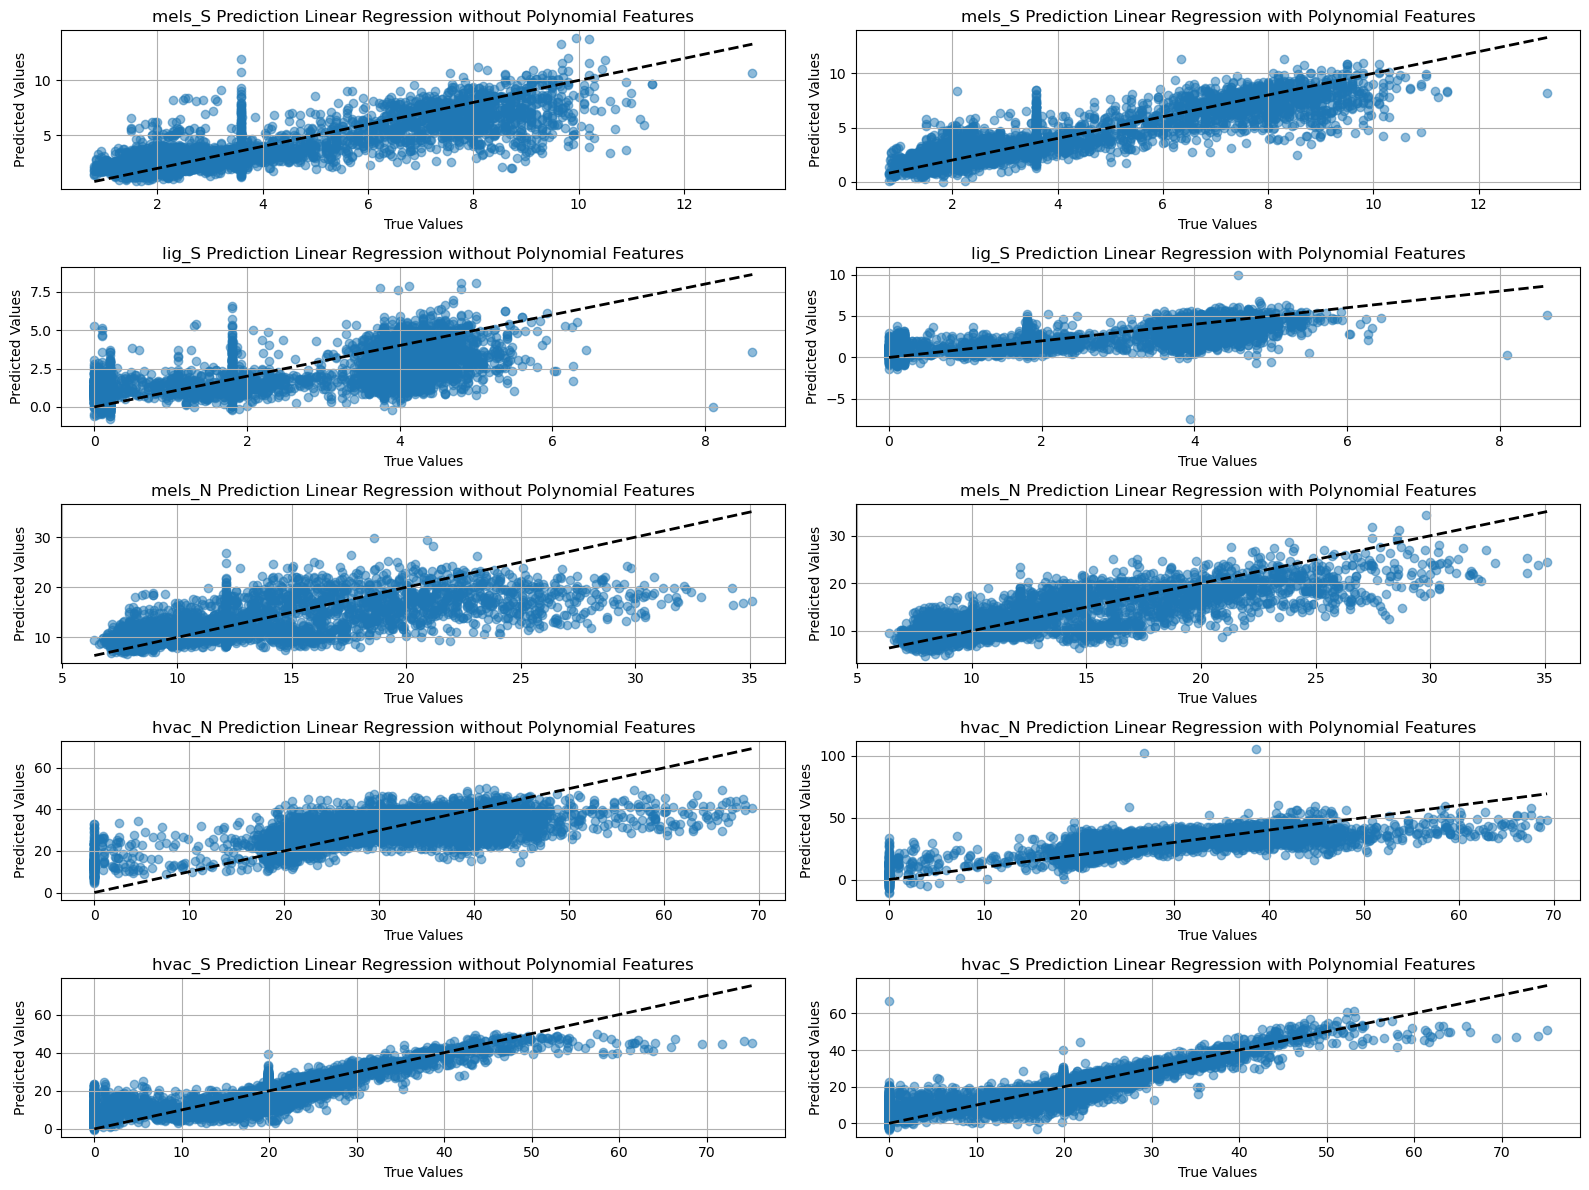

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for i in range(5):
    # Plotting LR without polynomial features
    plt.subplot(5, 2, 2*i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_without_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction Linear Regression without Polynomial Features')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    # Plotting LR with polynomial features
    plt.subplot(5, 2, 2*i+2)
    plt.scatter(y_test.iloc[:, i], y_preds_with_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction Linear Regression with Polynomial Features')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

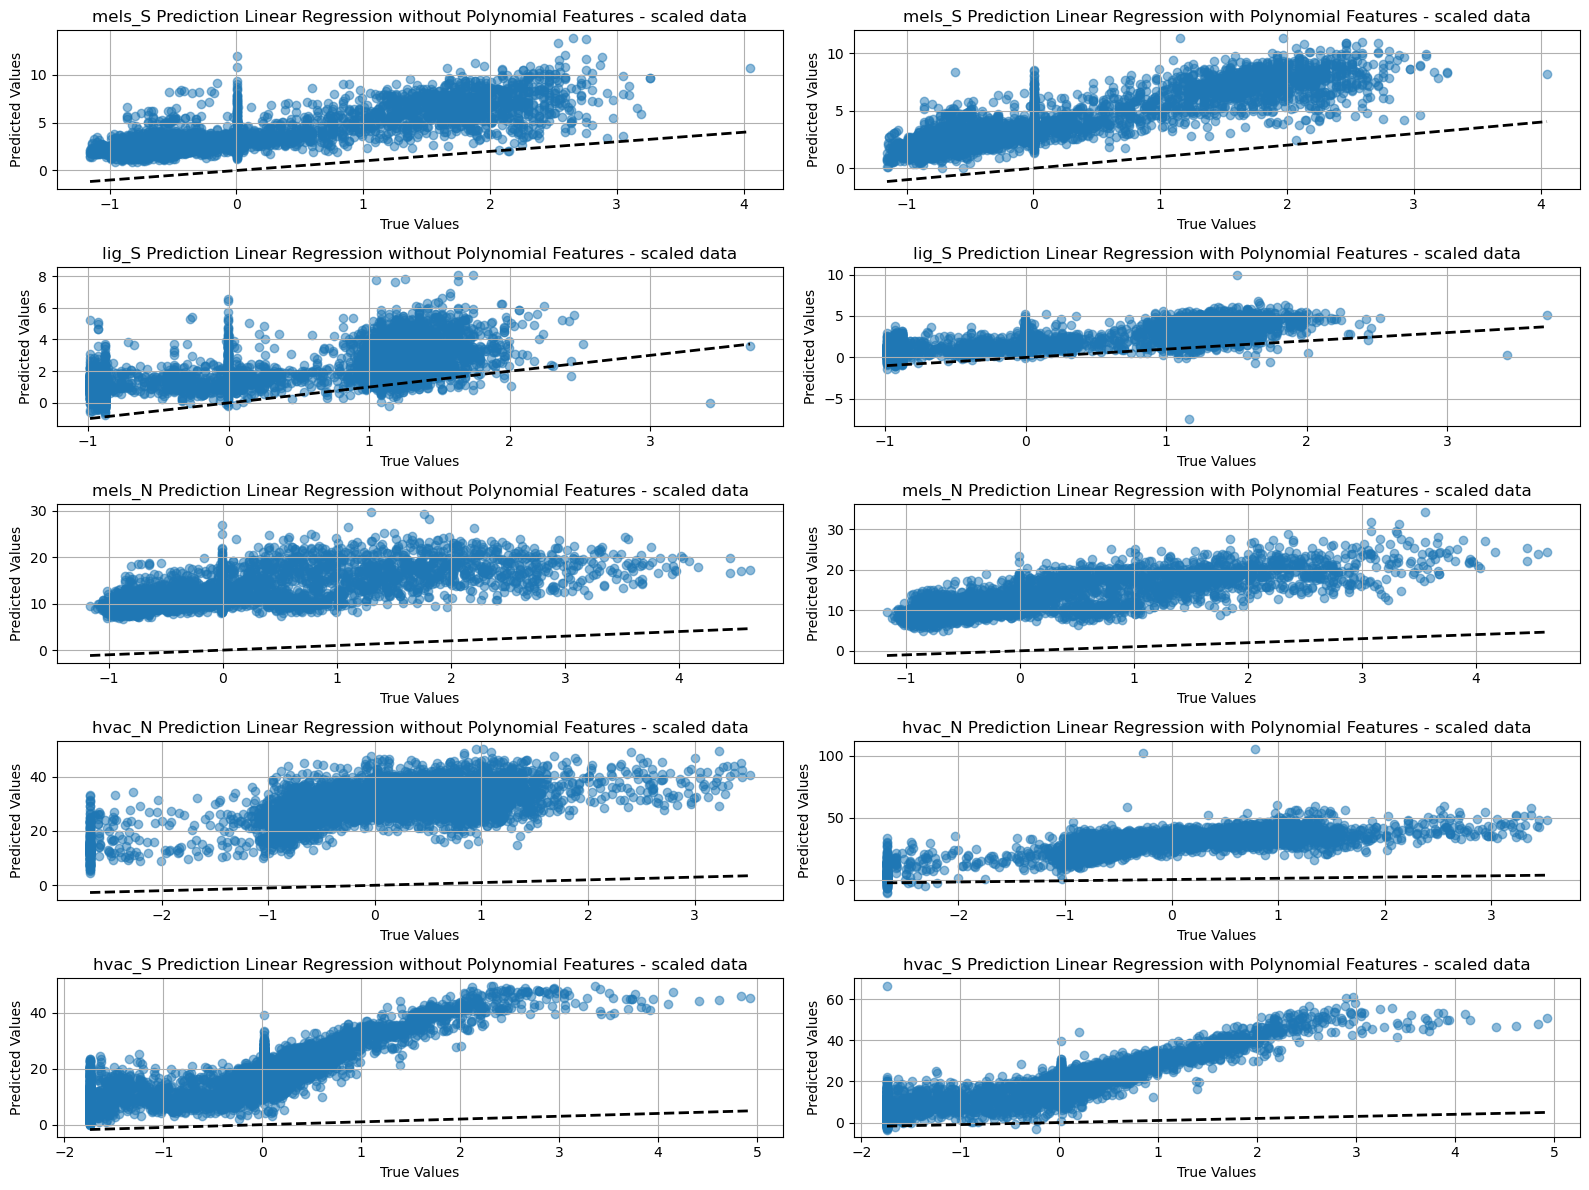

In [149]:
#Using scaled data

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for i in range(5):
    # Plotting LR scaled without polynomial features
    plt.subplot(5, 2, 2*i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_without_poly[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction Linear Regression without Polynomial Features - scaled data')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    # Plotting LR scaled with polynomial features
    plt.subplot(5, 2, 2*i+2)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_with_poly[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction Linear Regression with Polynomial Features - scaled data')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

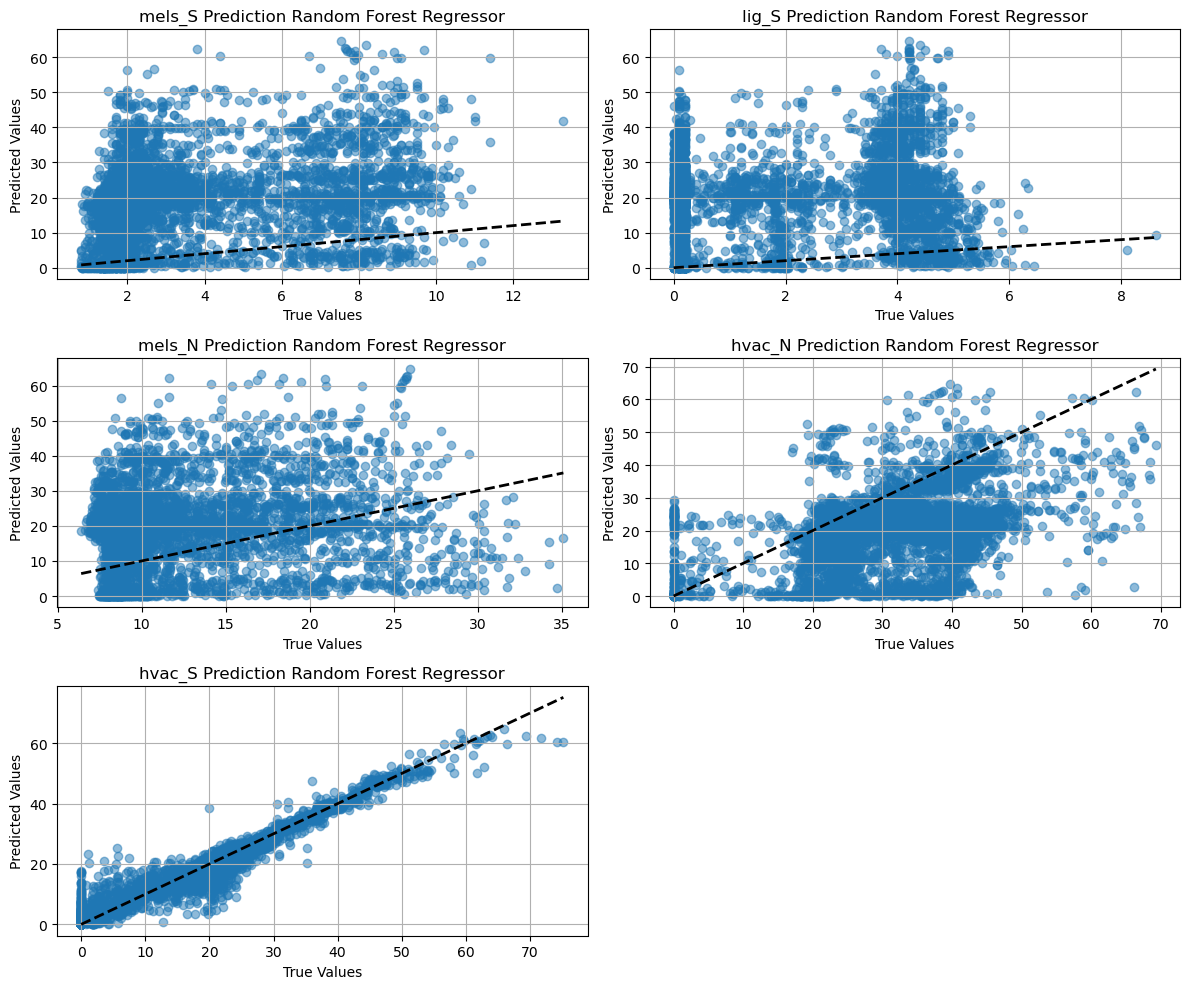

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plotting the graph for RFR
for i in range(y.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred_RF, alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction Random Forest Regressor')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


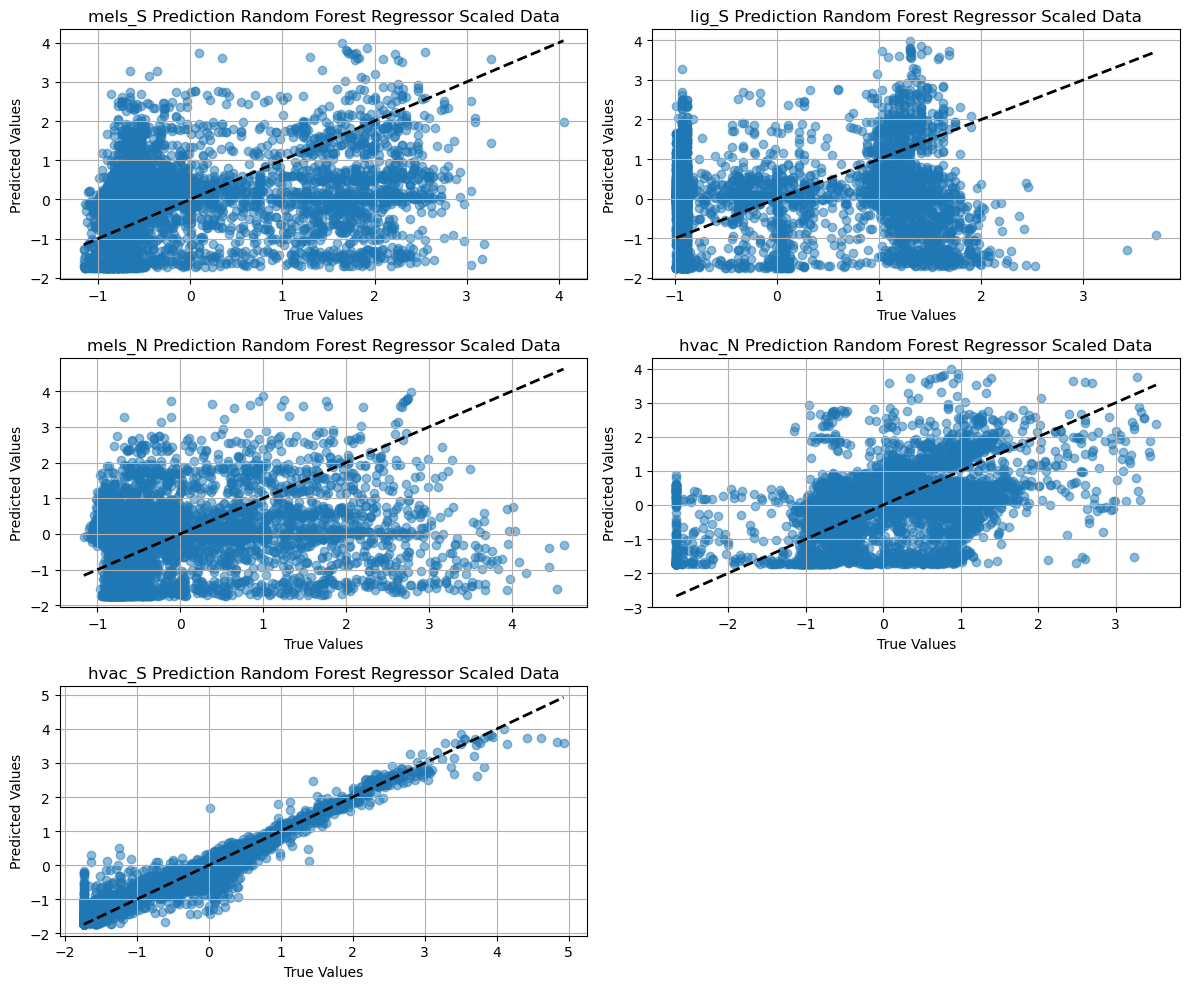

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plotting the graph for RFR
for i in range(y_scaled.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_pred_RF_scaled, alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction Random Forest Regressor Scaled Data')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

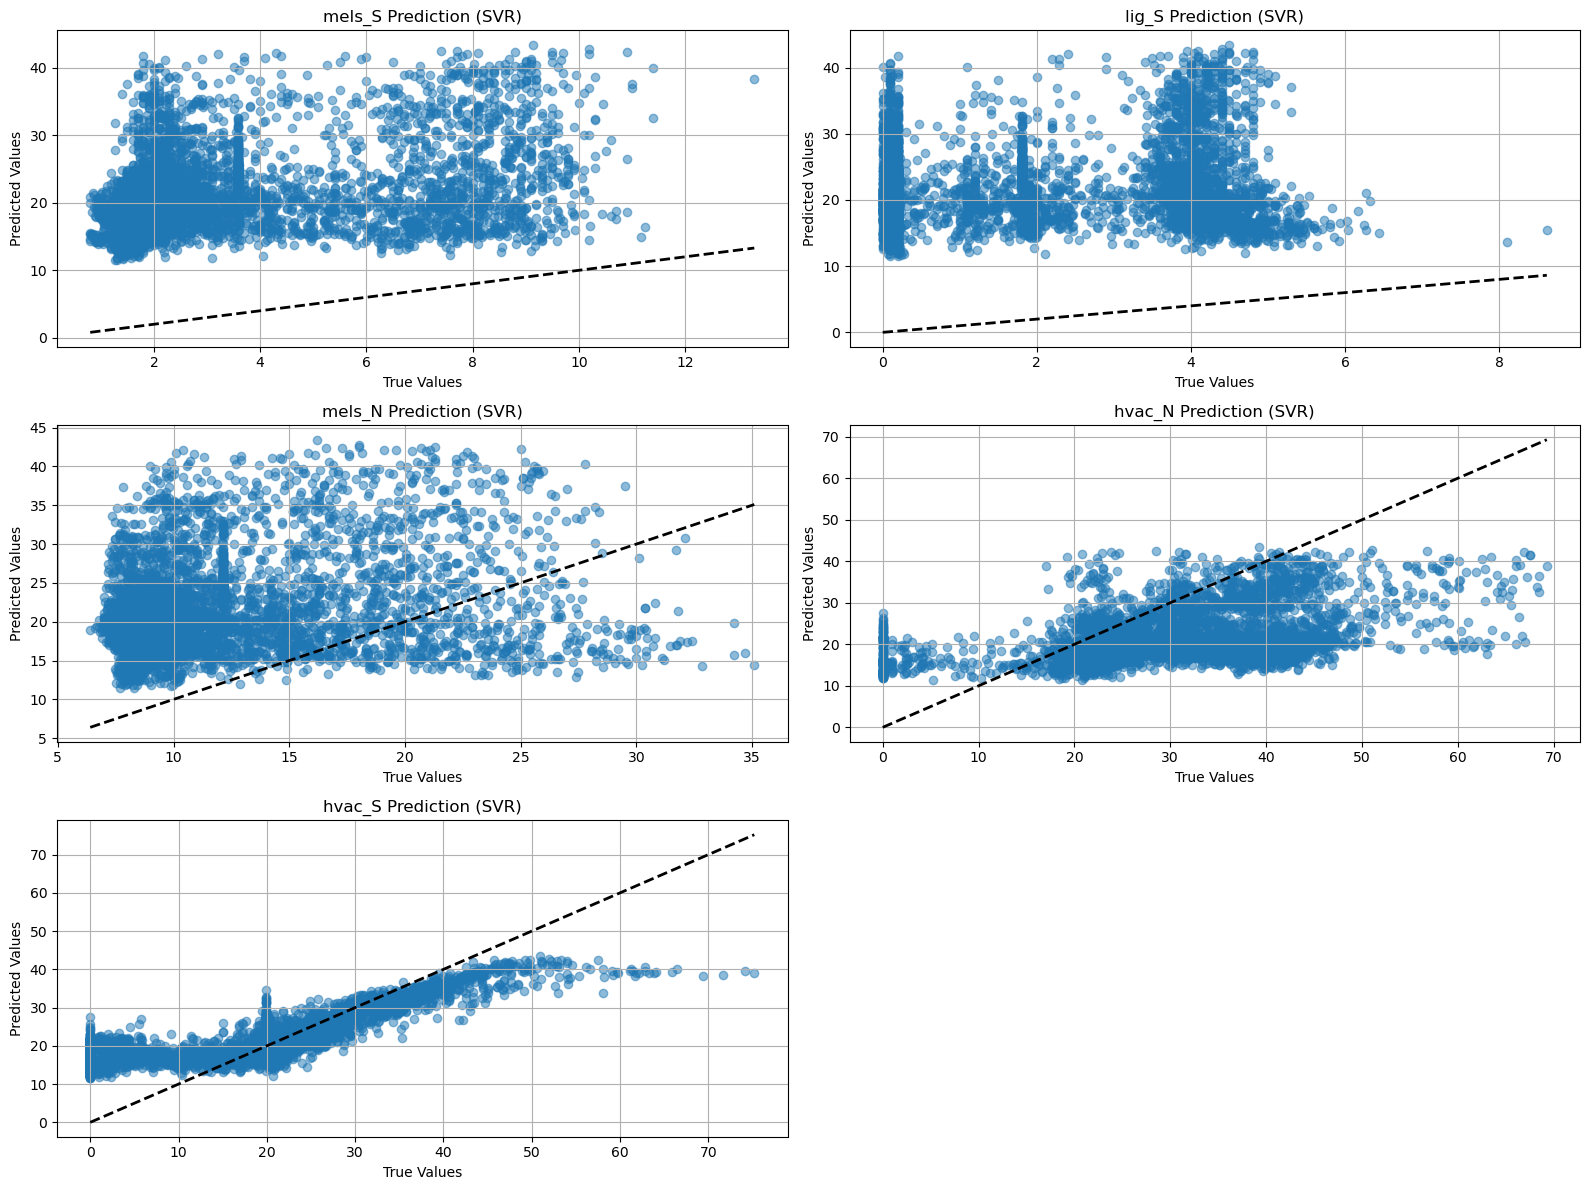

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for SVR
for i in range(y.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred_SVR, alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (SVR)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()


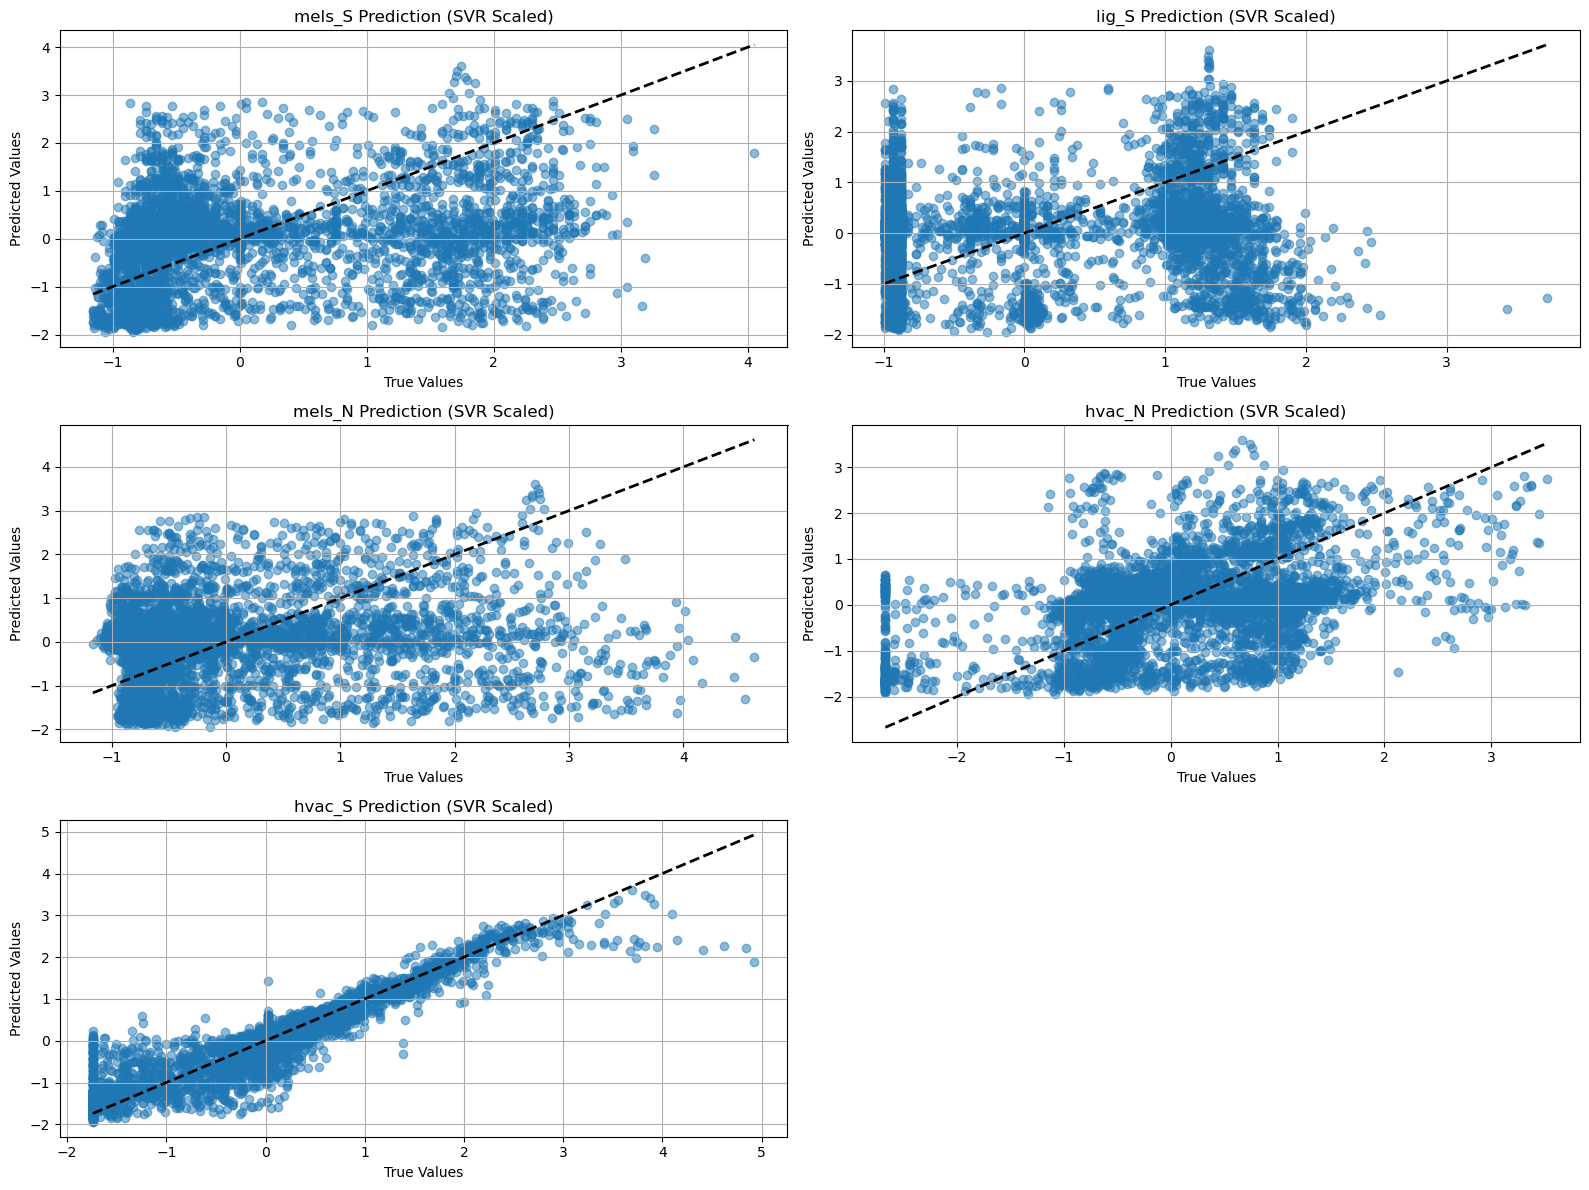

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for SVR (scaled)
for i in range(y_scaled.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_pred_SVR_scaled, alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (SVR Scaled)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

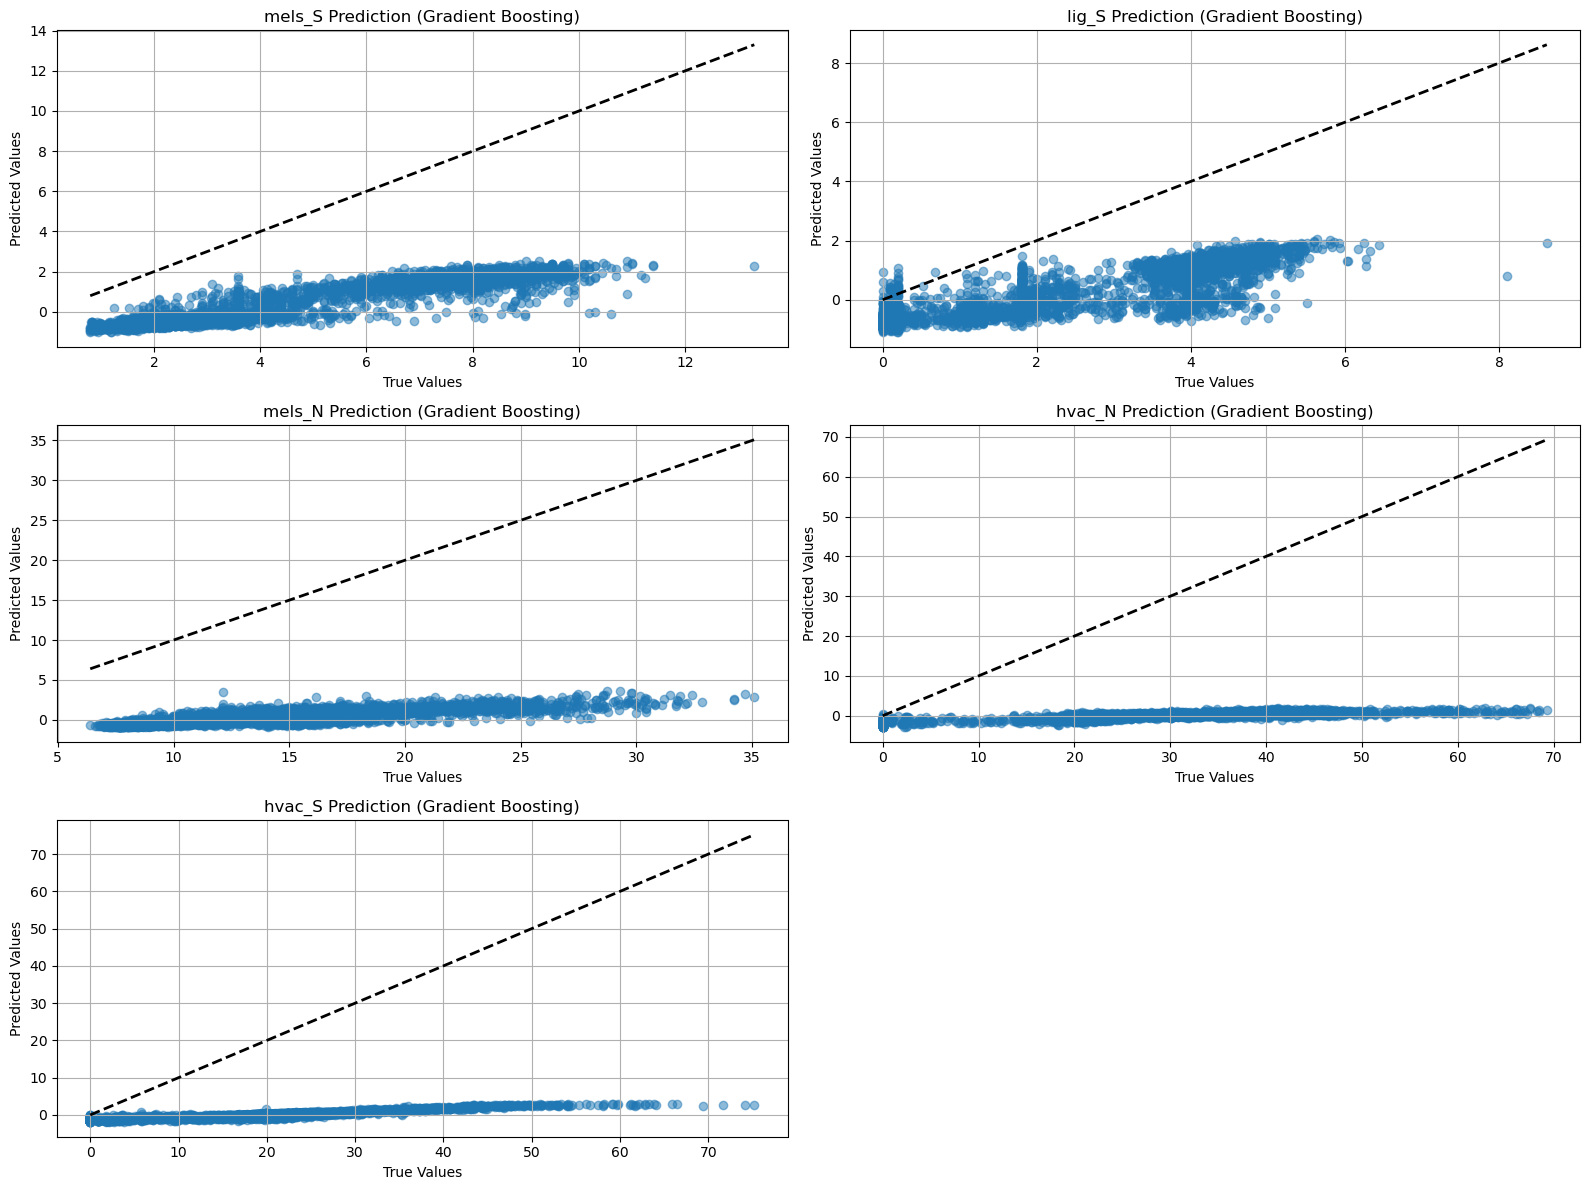

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_gb[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (Gradient Boosting)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

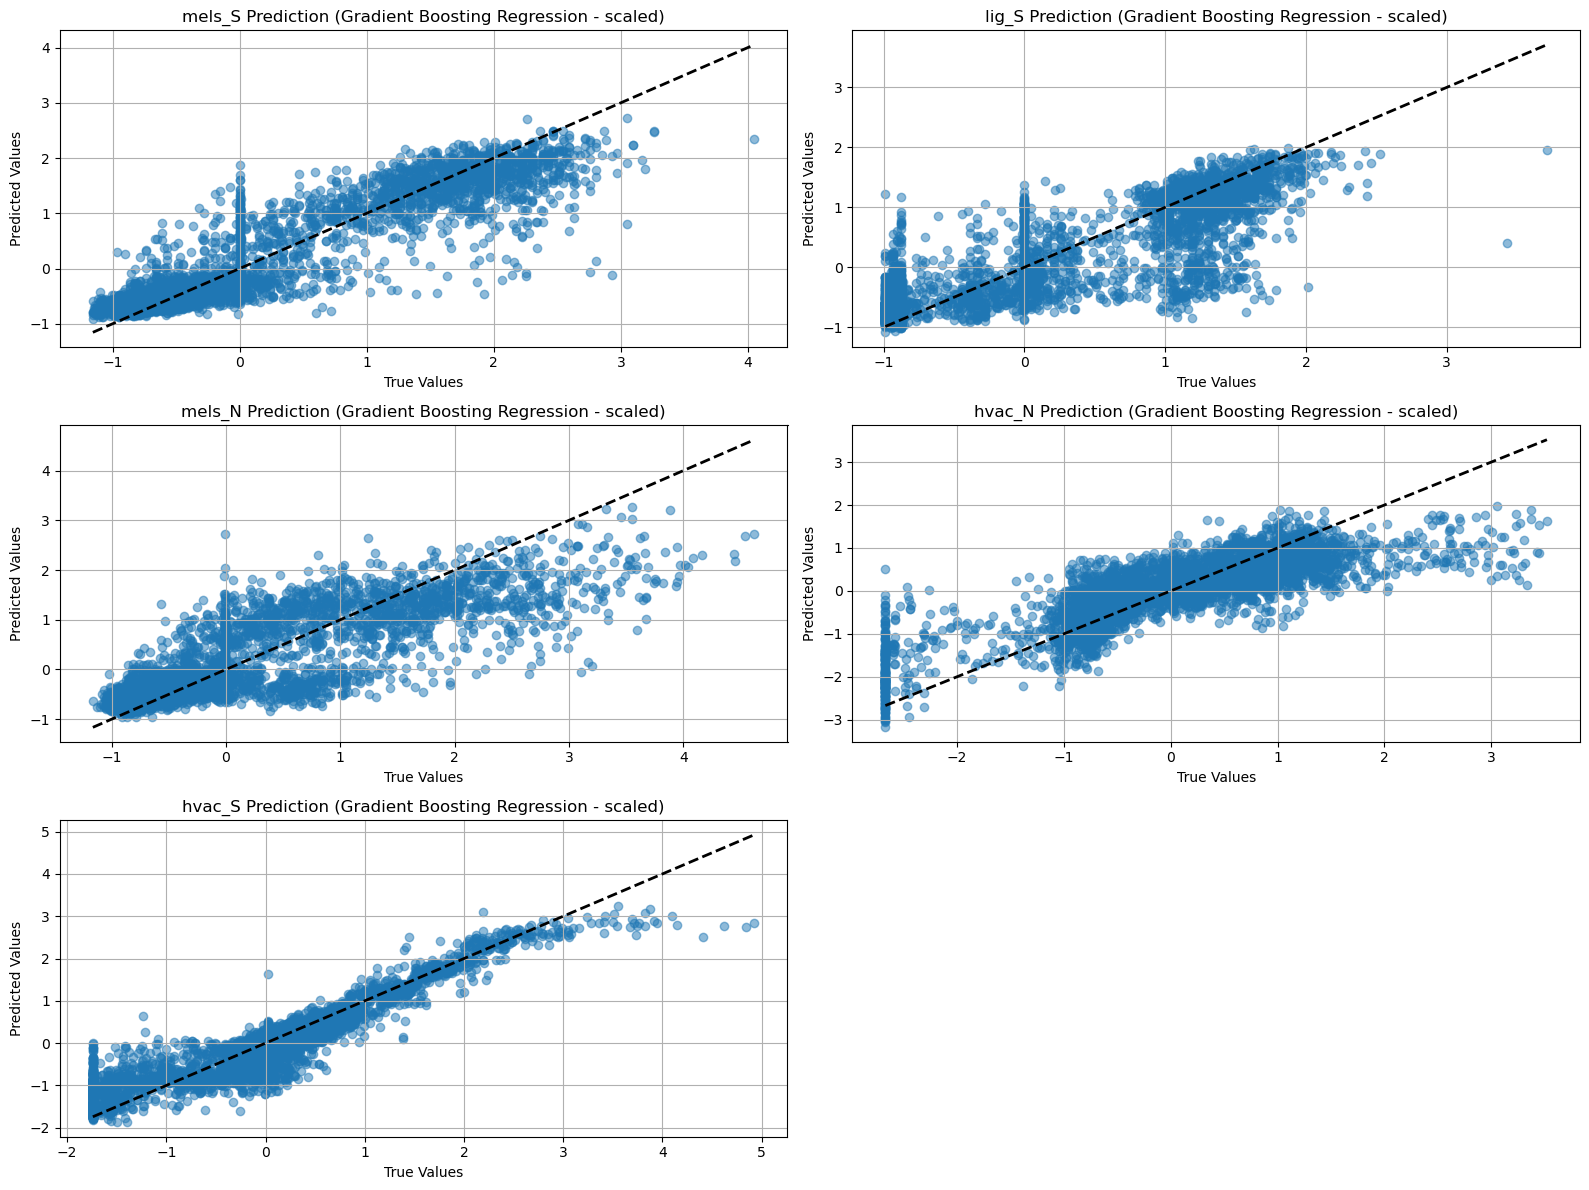

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR (scaled)
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_gb_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (Gradient Boosting Regression - scaled)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

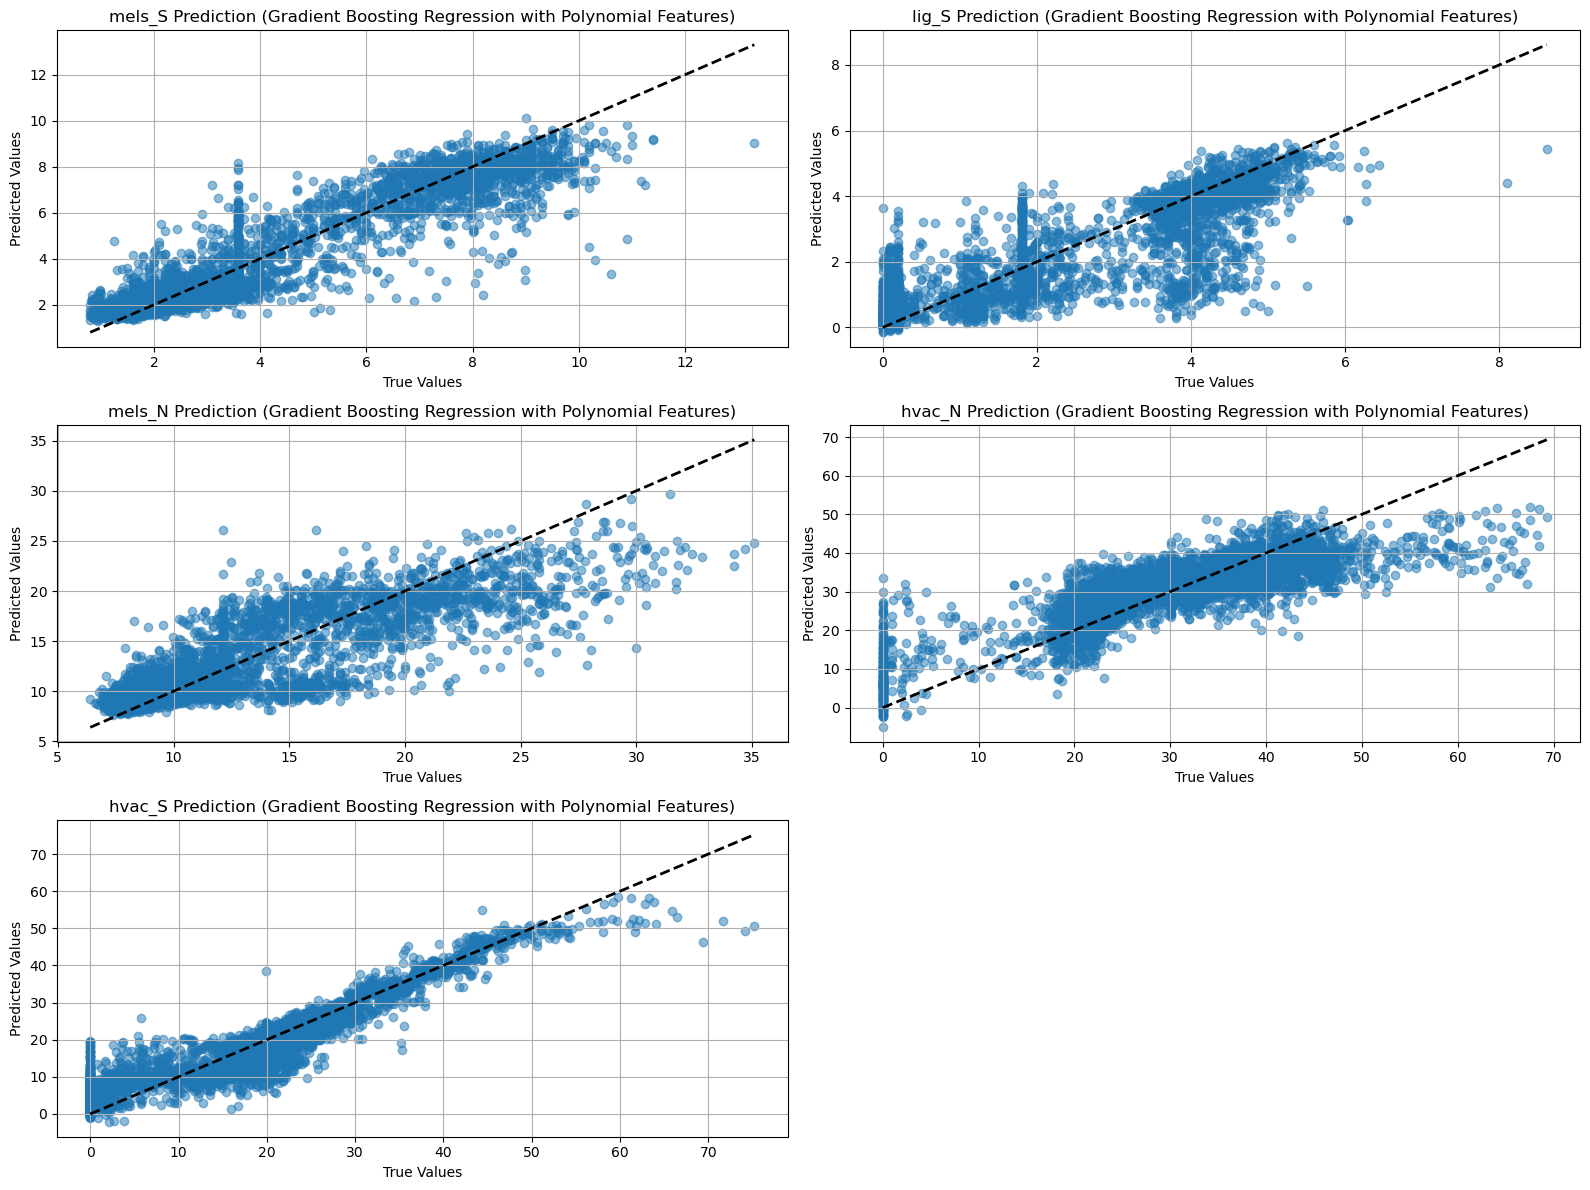

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR with polynomial features
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_preds_gb_poly[i], alpha=0.5)
    plt.plot([min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], [min(y_test.iloc[:, i]), max(y_test.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y.columns[i]} Prediction (Gradient Boosting Regression with Polynomial Features)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

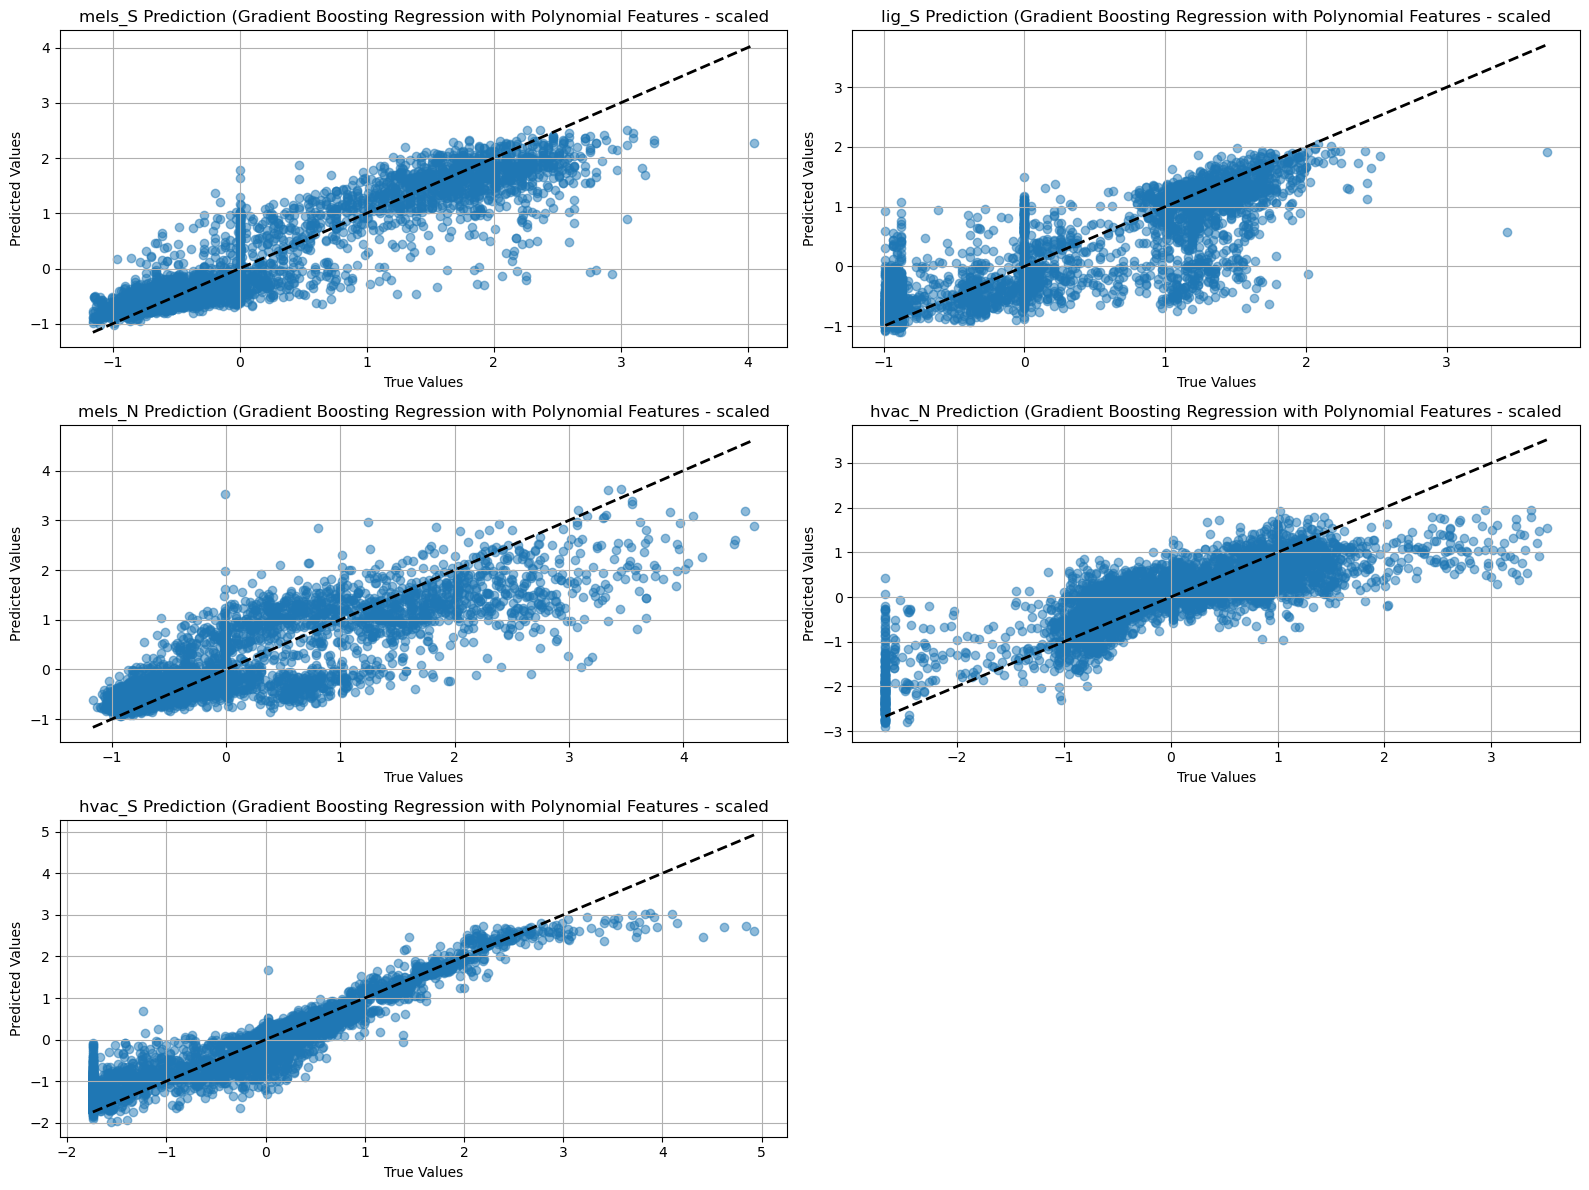

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plotting the graph for GBR with polynomial features (scaled)
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(y_test_scaled.iloc[:, i], y_preds_gb_poly_scaled[i], alpha=0.5)
    plt.plot([min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], [min(y_test_scaled.iloc[:, i]), max(y_test_scaled.iloc[:, i])], 'k--', lw=2)
    plt.title(f'{y_scaled.columns[i]} Prediction (Gradient Boosting Regression with Polynomial Features - scaled')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()